# PROYEK ANALISIS DATA

## MENYIAPKAN SEMUA LIBRARY YANG DIBUTUHKAN

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sci

## GATHERING DATA

In [69]:
train = pd.read_csv('./data/train.csv', sep=',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## ASSESSING DATA

### INFO UMUM

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### STATISTIK UMUM

In [71]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### DUPLIKASI

In [72]:
print('jumlah duplikasi : ', train.duplicated().sum())

jumlah duplikasi :  0


### MISSING VALUE

In [73]:
missing_values = train.isna().sum()
def checkMissingValue():
    missing_values = train.isna().sum()
    print(missing_values[missing_values > 0])
    print('jumlah feature yang memiliki nilai kosong : ', missing_values[missing_values > 0].count())

checkMissingValue()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
jumlah feature yang memiliki nilai kosong :  19


## CLEANING DATA

### CLEAN MISSING VALUE

In [74]:
# JUMLAH DATA PALING BANYAK BERDASAKAN STATISTIK UMUM => 1460
missing_limit = 0.75 * 1460

# berjumlah < 75%
less = missing_values[missing_values < missing_limit].index
over = missing_values[missing_values >= missing_limit].index

#### < 75% miss

In [75]:
# seleksi kolom numerik
numeric_feature = train[less].select_dtypes(include='number').columns
print(numeric_feature)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [77]:
# mengisi nilai yang hilang dengan median(nilai tengah) untuk kolom numerik
for column in numeric_feature:
    train[column] = train[column].fillna(train[column].median())

checkMissingValue()

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
jumlah feature yang memiliki nilai kosong :  16


In [80]:
# seleksi kolom kategorikal
kategorical_feature = train[less].select_dtypes(include='object').columns
print(kategorical_feature)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [81]:
# mengisi nilai yang hilang dengan nilai yang banyak muncul mode()
for column in kategorical_feature:
    train[column] = train[column].fillna(train[column].mode()[0])

checkMissingValue()

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64
jumlah feature yang memiliki nilai kosong :  4


#### > 75% miss

In [82]:
# karena nilai yang hilang terlalu banyak maka dapat dipertimbangkan untuk menghapus kolomnya
train = train.drop(columns=over)
checkMissingValue()

Series([], dtype: int64)
jumlah feature yang memiliki nilai kosong :  0


### OUTLIERS

In [85]:
numeric_feature = train.select_dtypes(include='number').columns

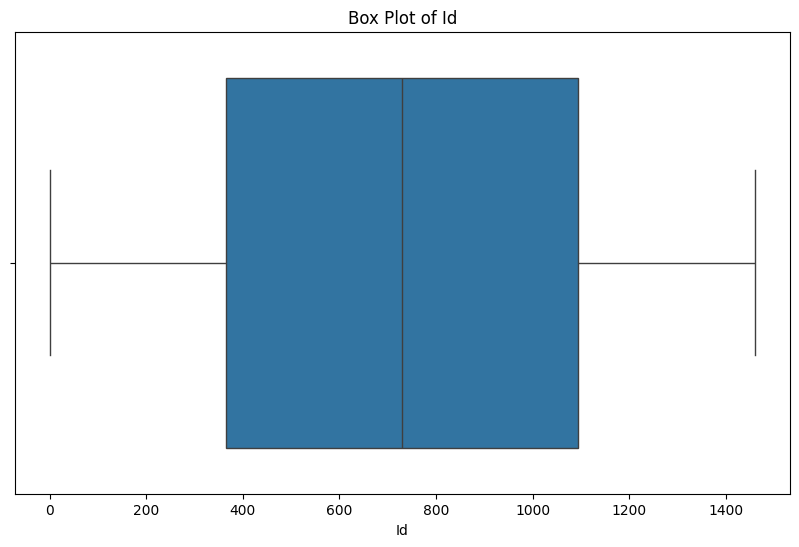

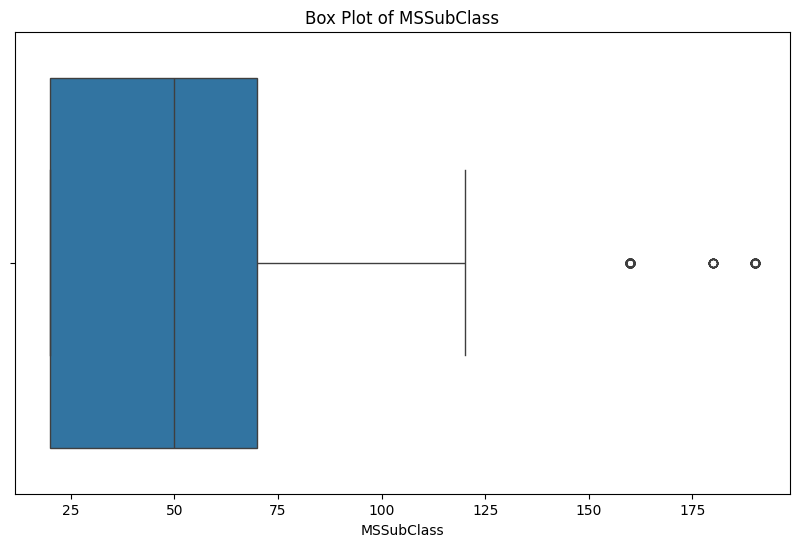

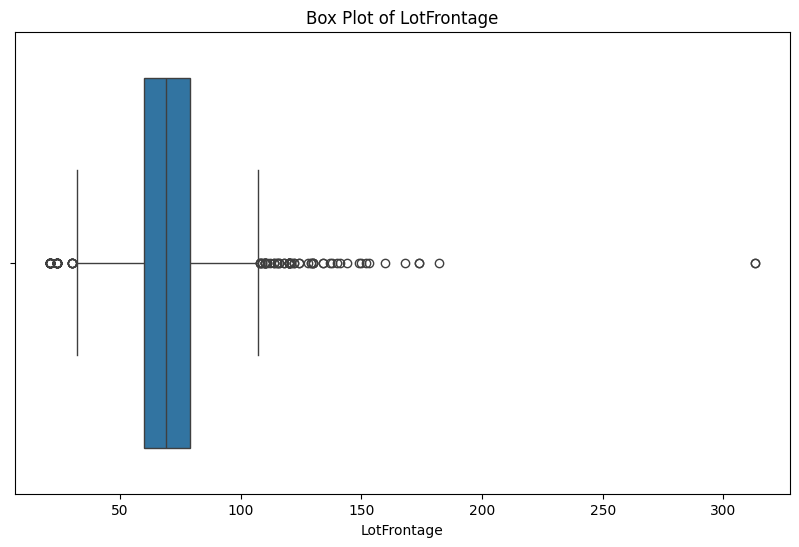

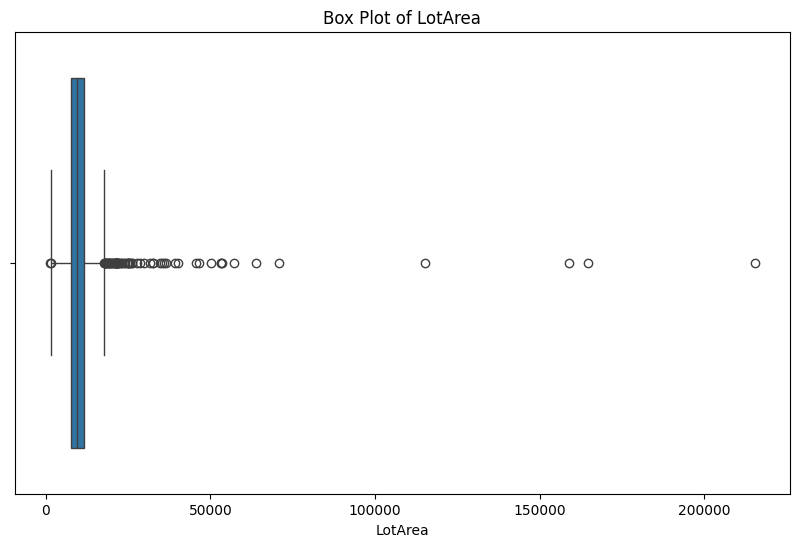

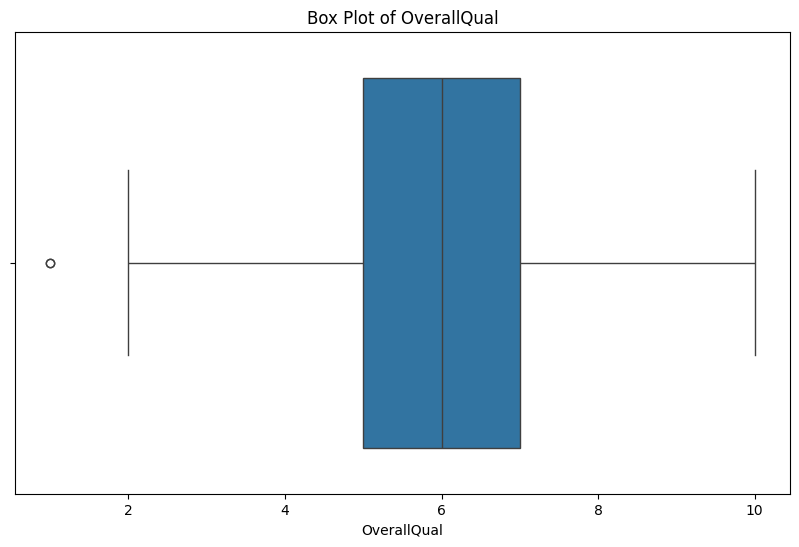

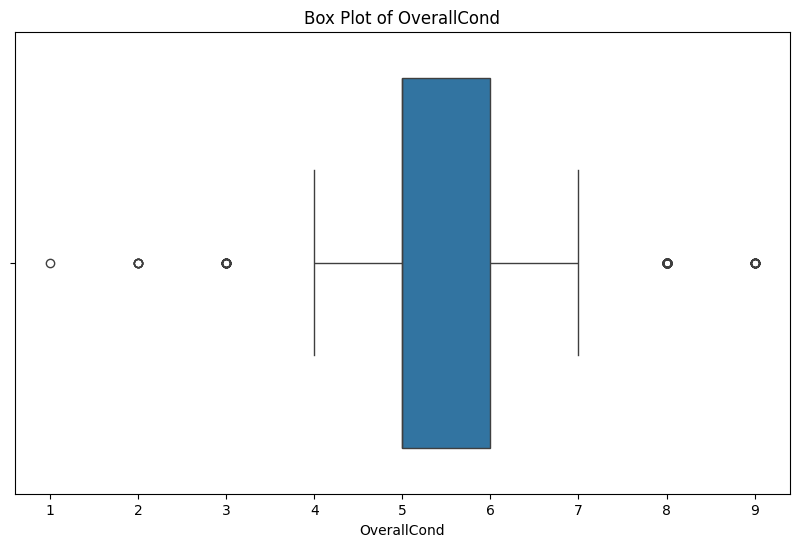

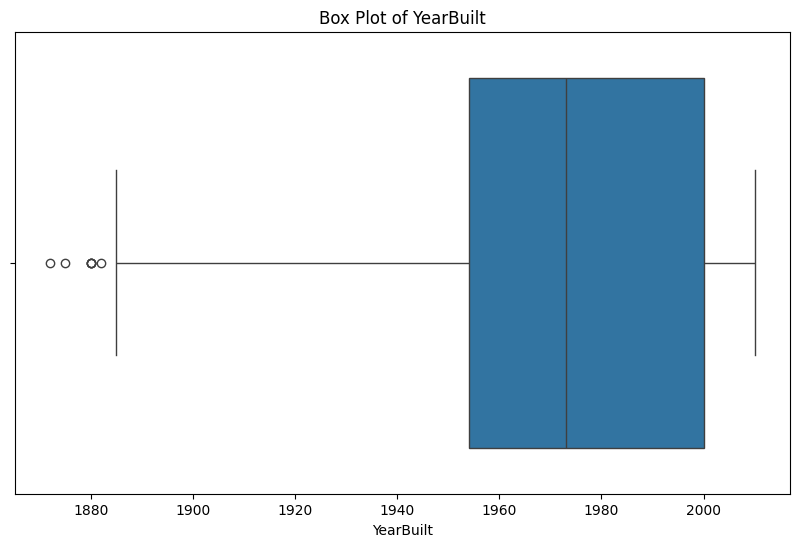

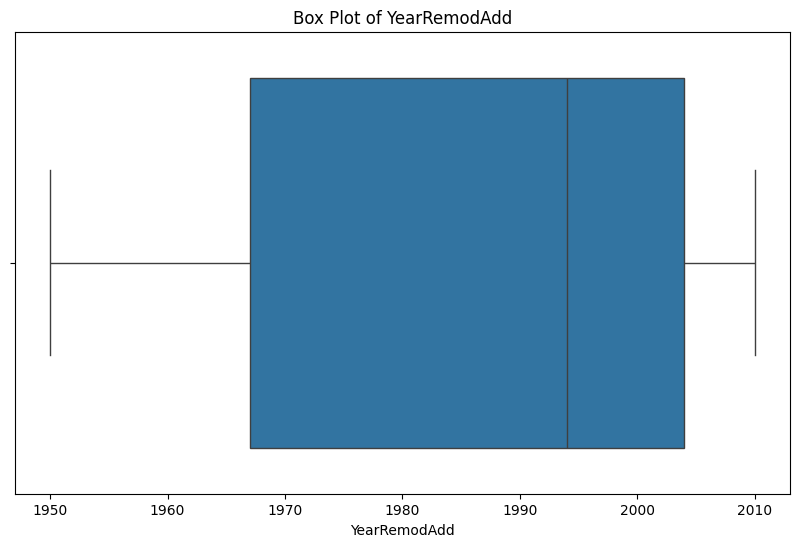

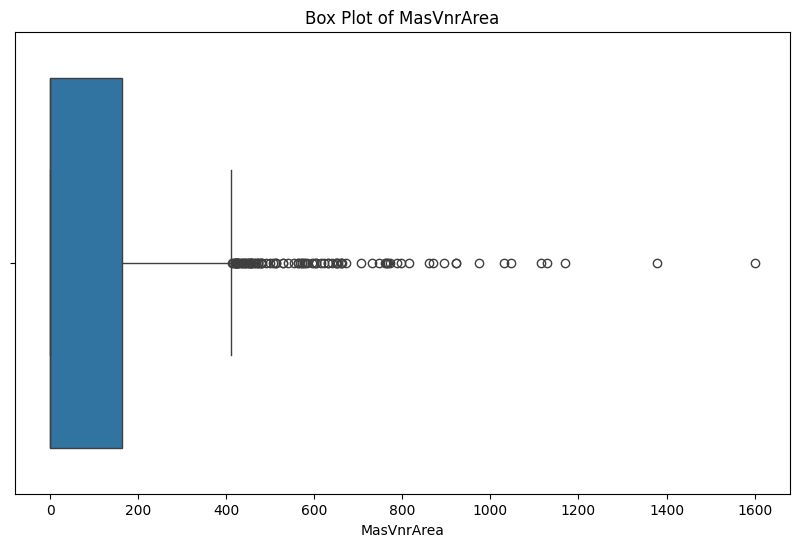

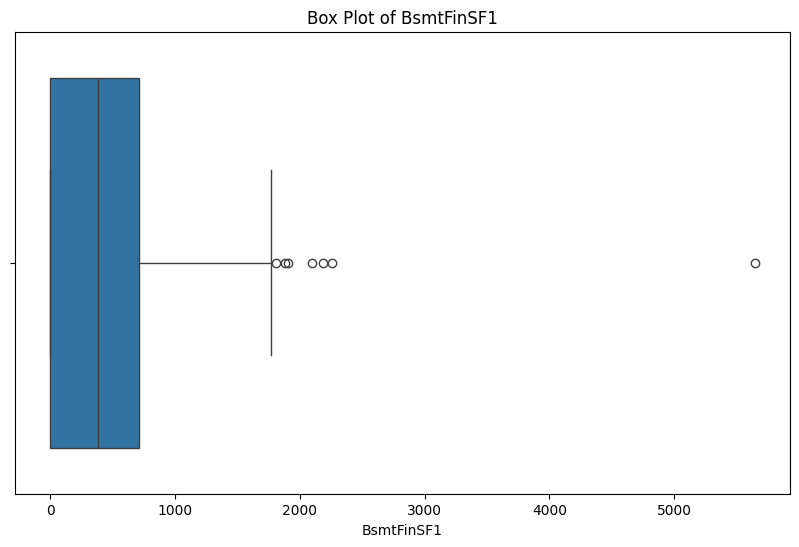

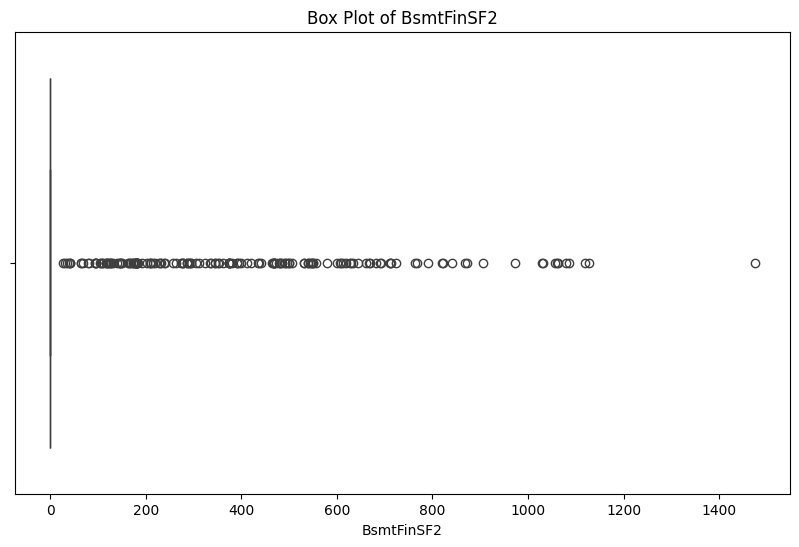

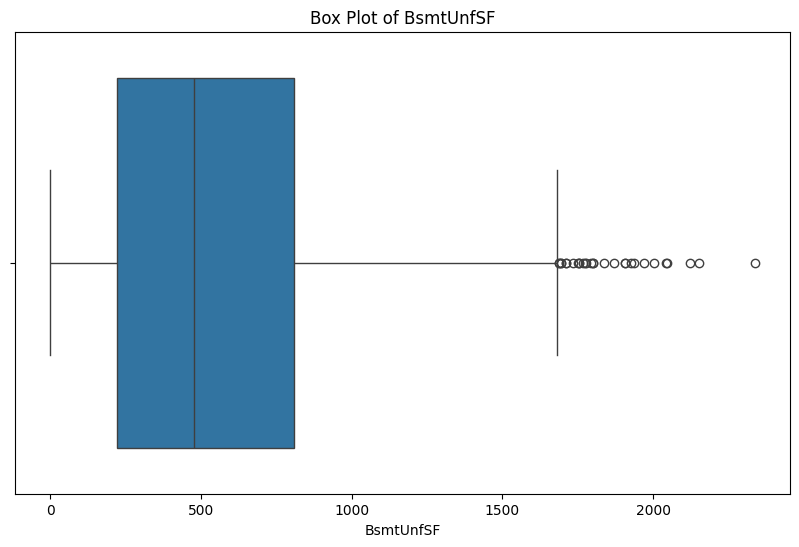

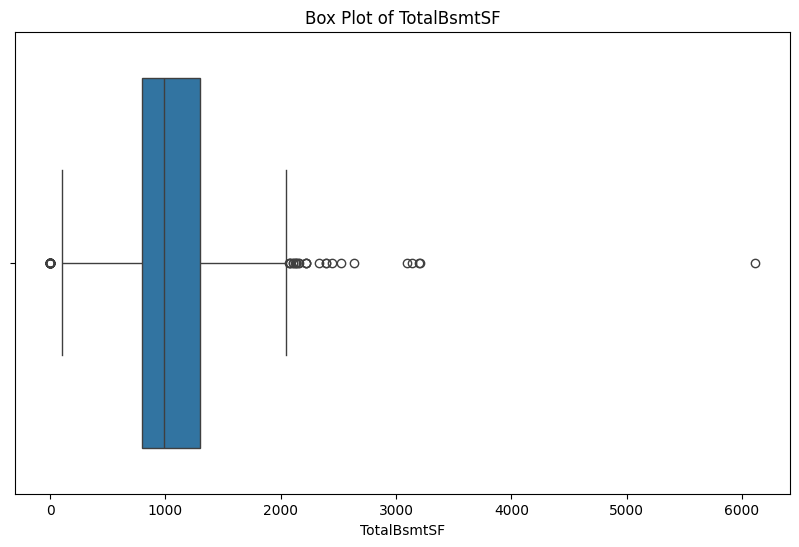

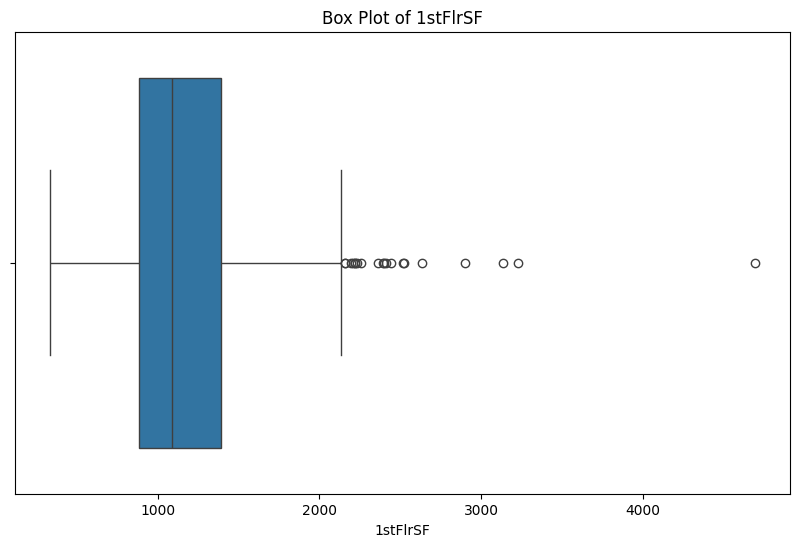

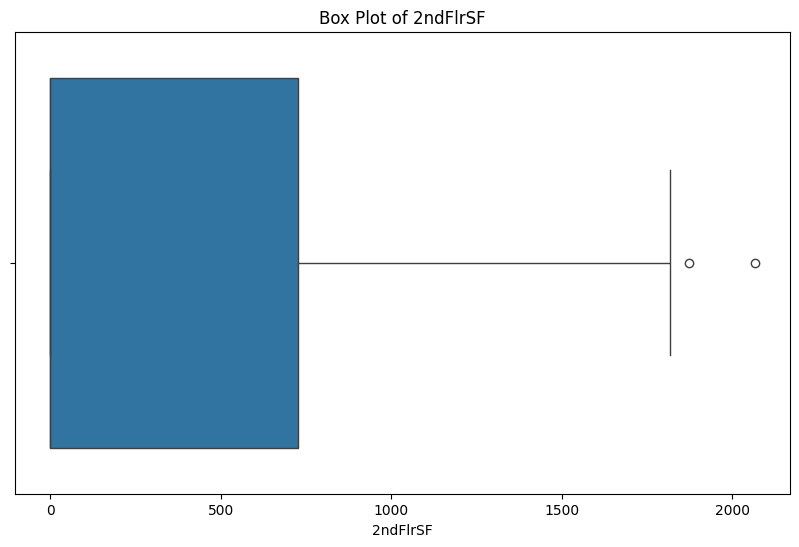

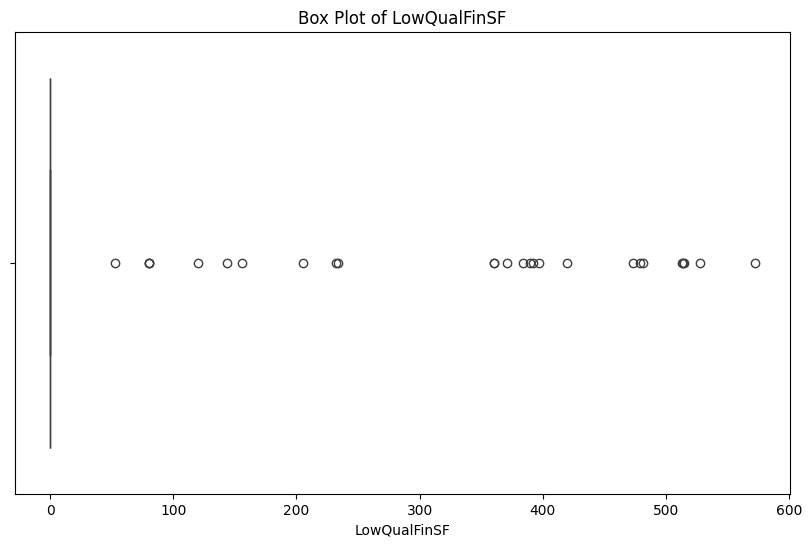

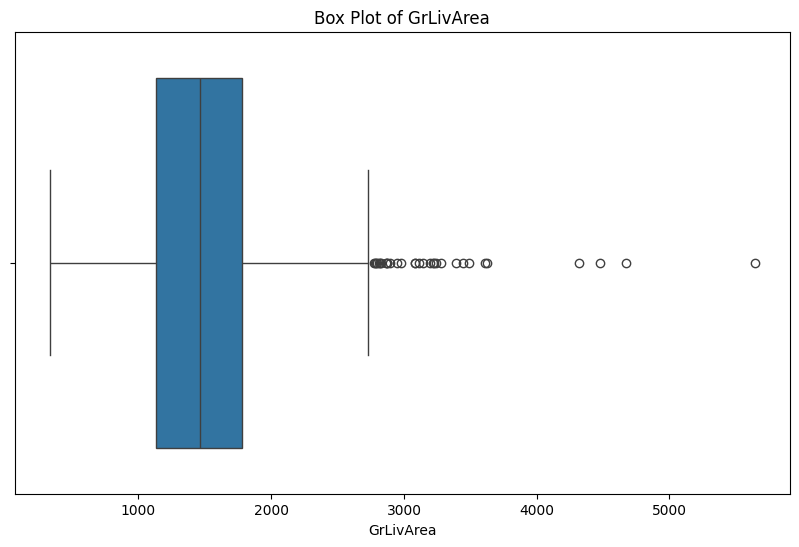

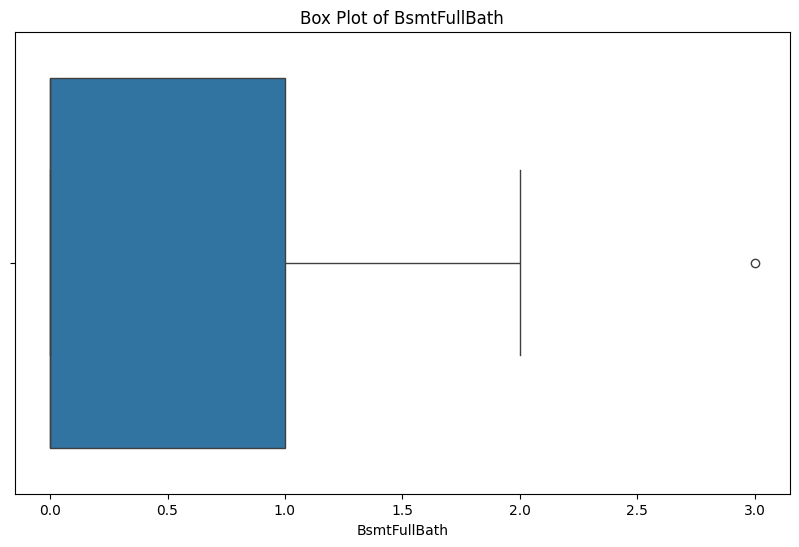

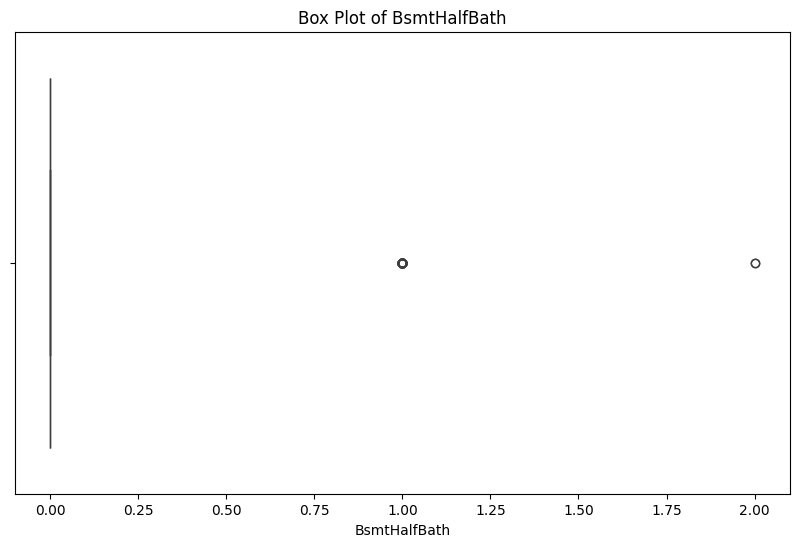

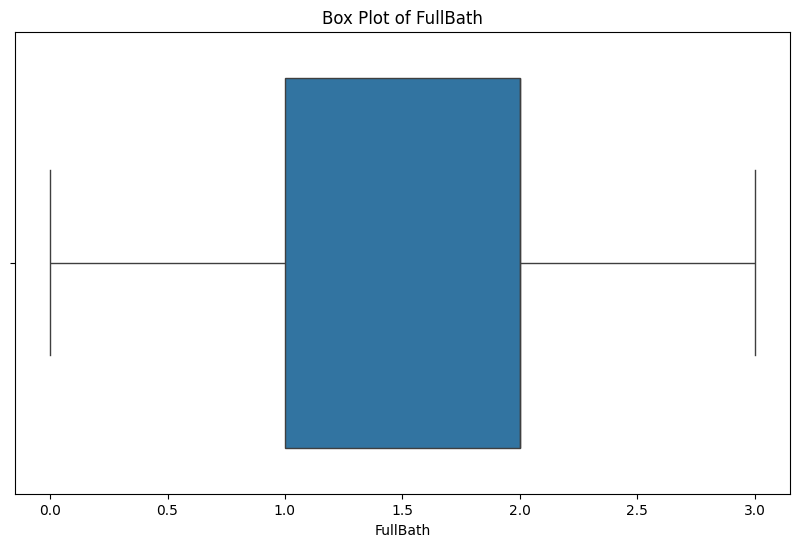

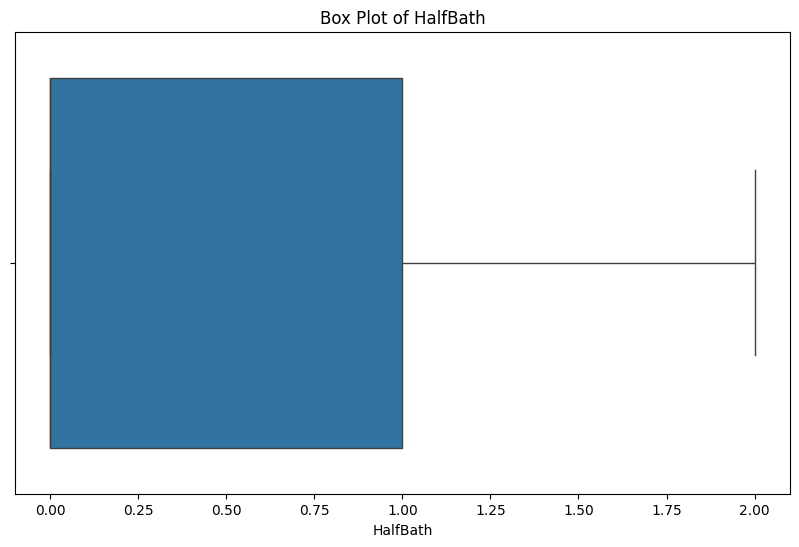

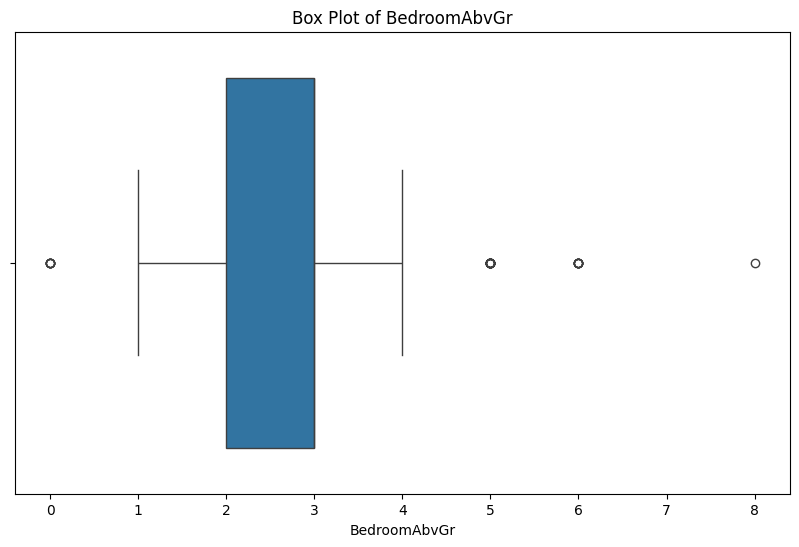

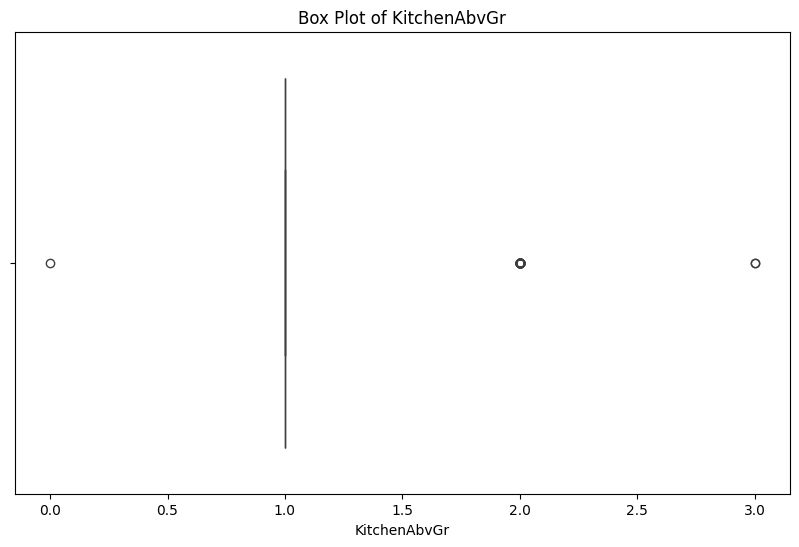

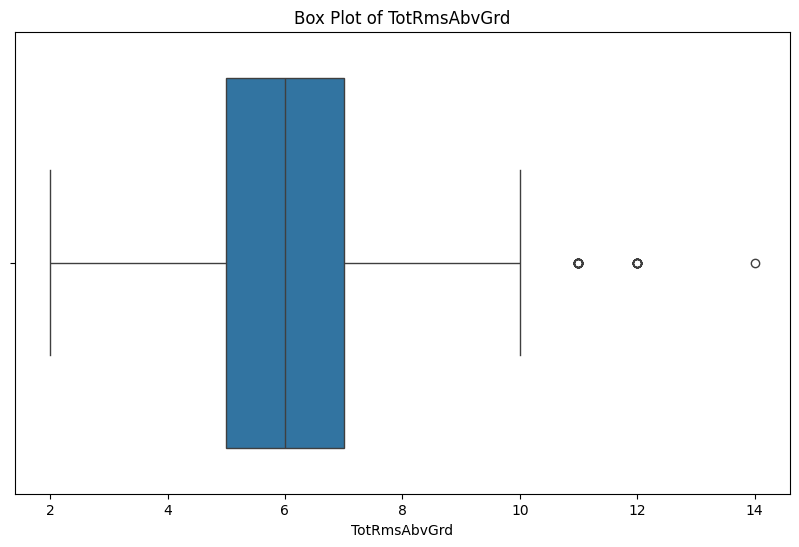

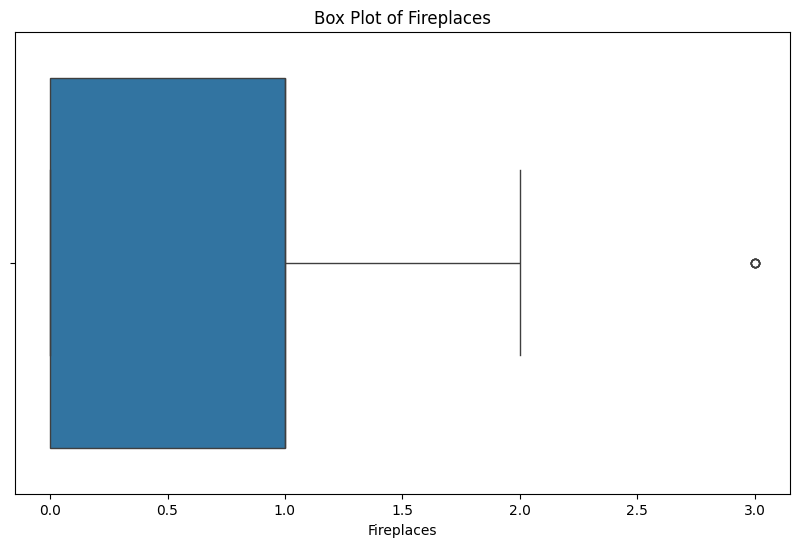

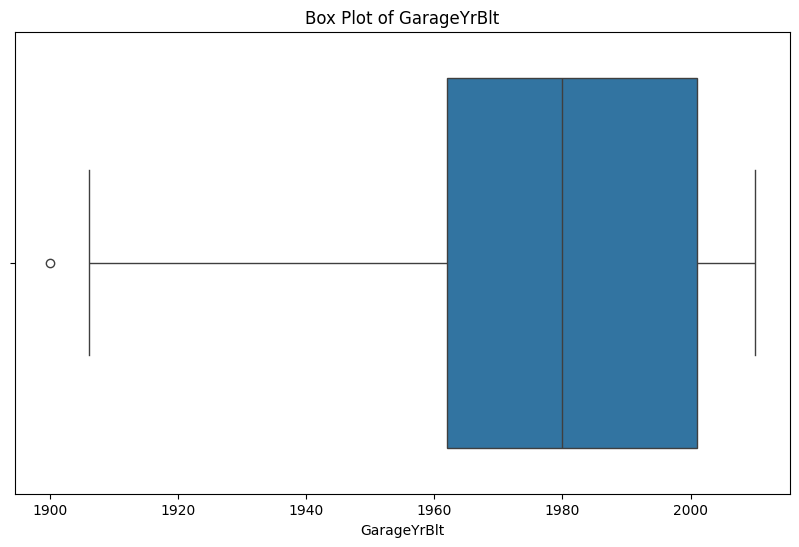

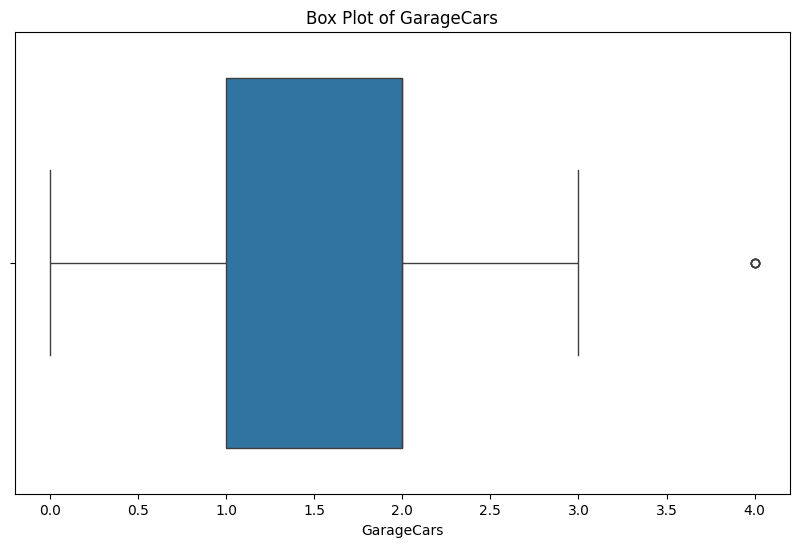

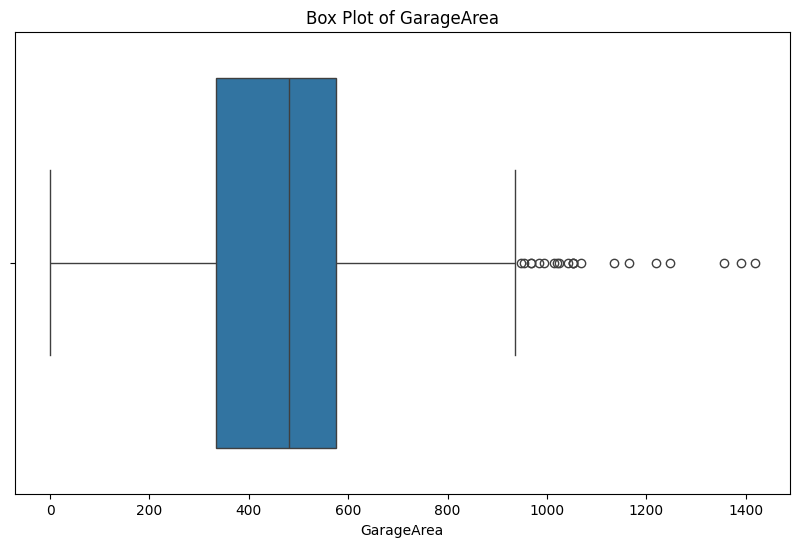

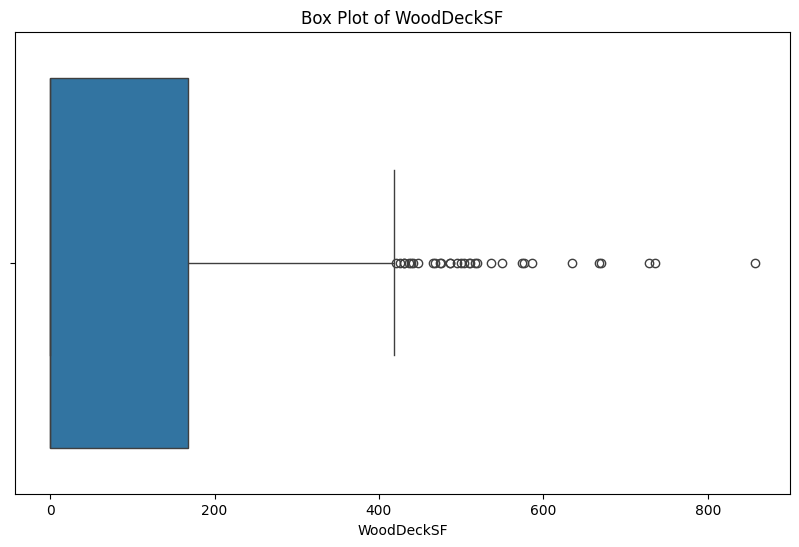

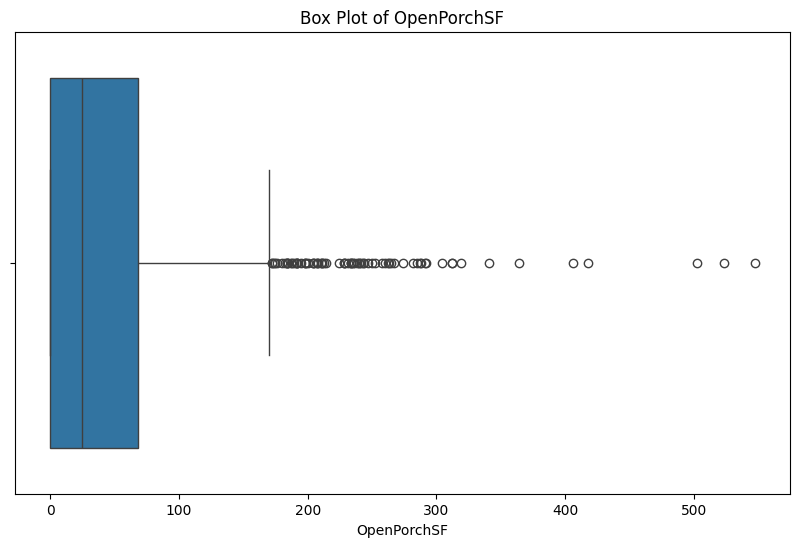

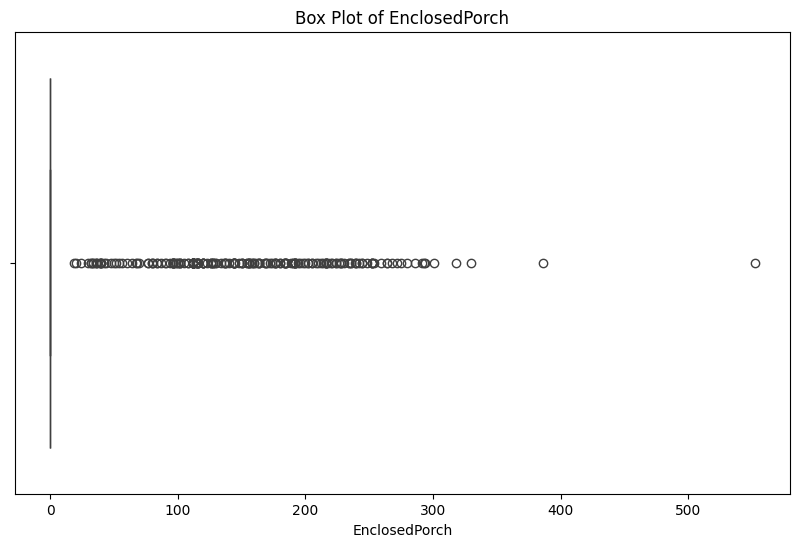

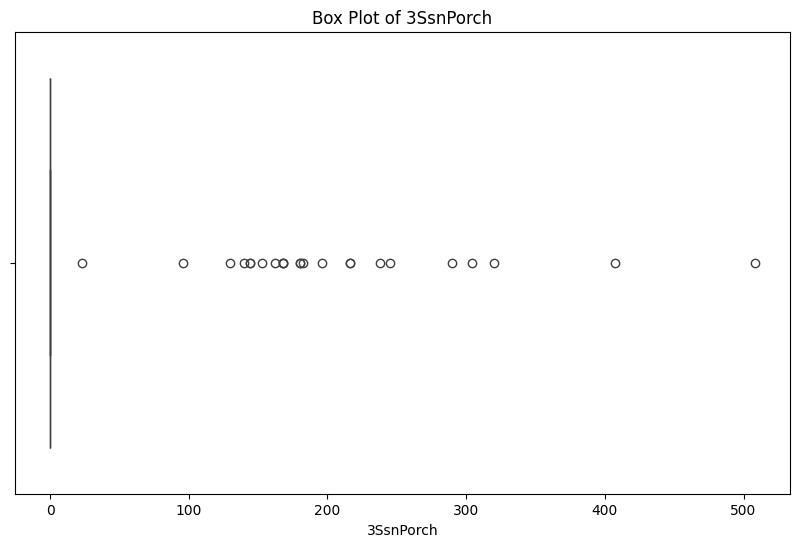

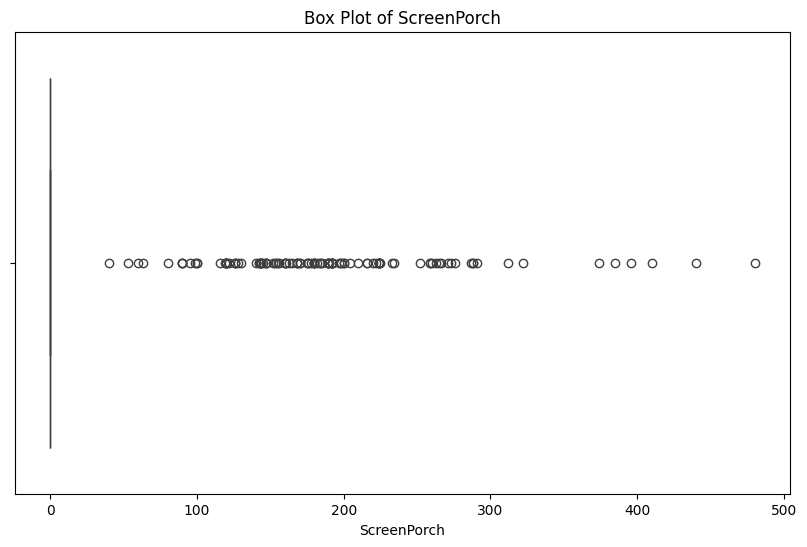

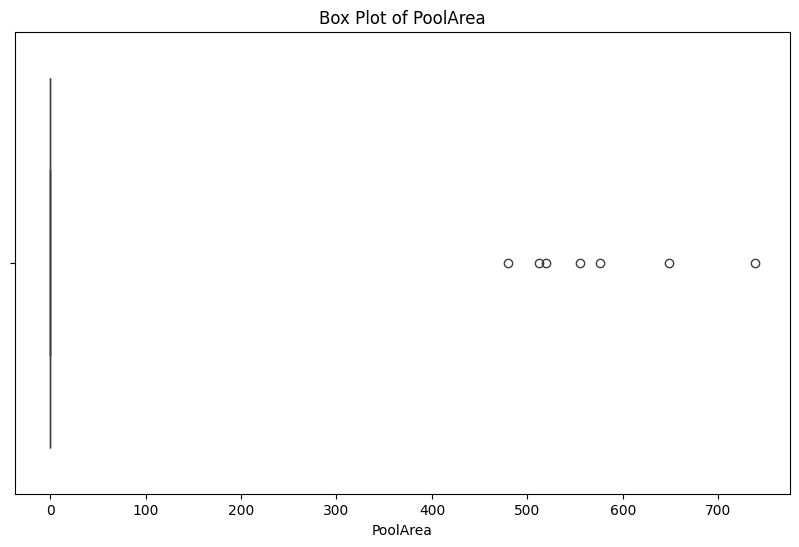

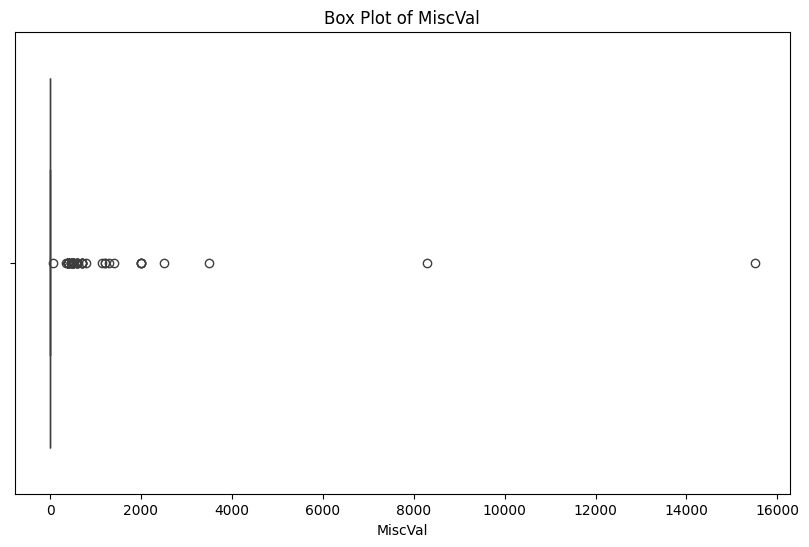

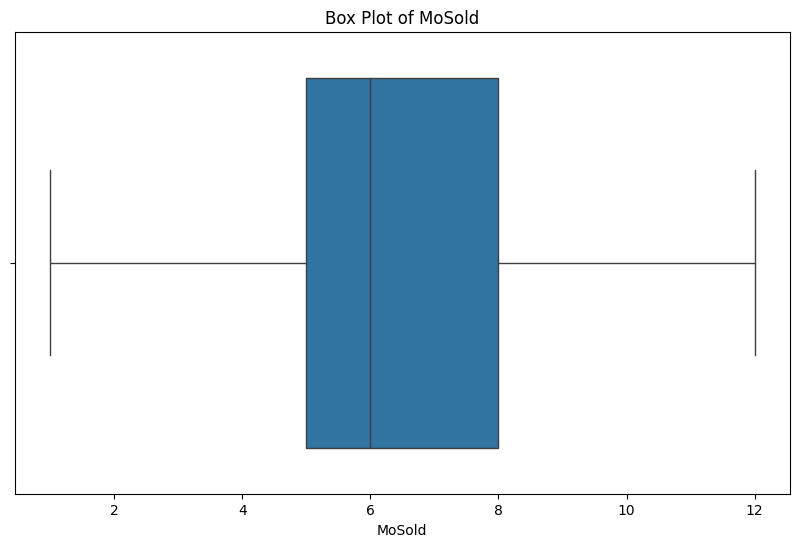

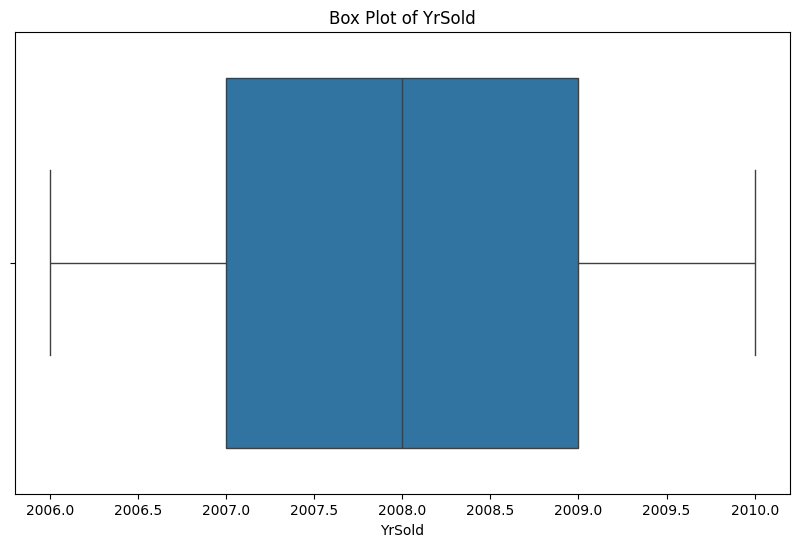

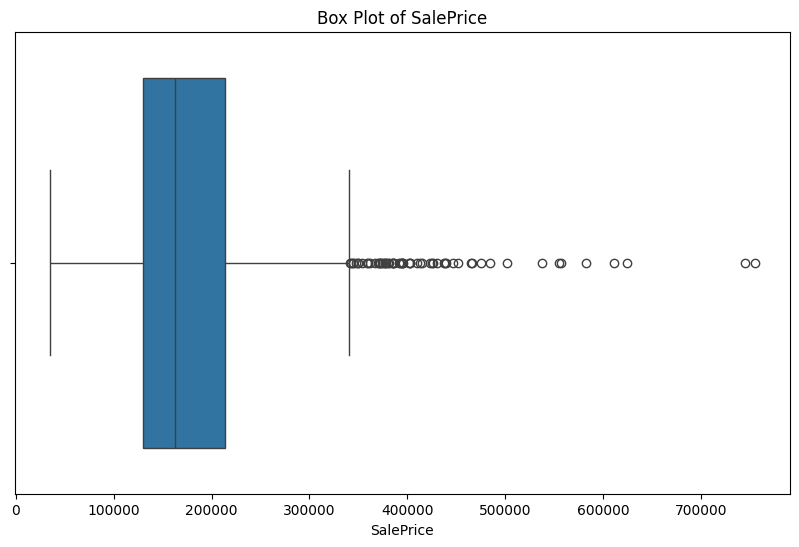

In [86]:
for feature in numeric_feature:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [89]:
# mengidentifikasi outlier dengan iqr
q1 = train[numeric_feature].quantile(0.25)
q3 = train[numeric_feature].quantile(0.75)
iqr = q3 - q1

print(iqr)
print('jumlah kolom numerik : ', iqr.count())

Id                 729.50
MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         39.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [95]:
# filter dataframe untuk hanya menyimpan baris yang tidak mengandung outlier pada kolom numerik
condition = ~((train[numeric_feature] < (q1 - 1.5 * iqr)) | (train[numeric_feature] > (q3 + 1.5 * iqr))).any(axis=1)
train_filtered_numerical = train.loc[condition, numeric_feature]
train_filtered_numerical.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.0,557.0,557.0,557.0,557.0,557.000000,557.000000,557.000000
mean,742.156194,48.797127,68.488330,9223.326750,6.236984,5.369838,1983.369838,1989.206463,72.942549,444.728905,...,90.540395,41.211849,0.0,0.0,0.0,0.0,0.0,6.332136,2007.786355,178927.646320
std,419.356953,31.410031,13.174751,2723.088066,1.242762,0.706869,25.054825,19.596618,104.034860,408.968940,...,98.092879,45.074100,0.0,0.0,0.0,0.0,0.0,2.653745,1.321907,55267.724152
min,1.000000,20.000000,32.000000,2887.000000,2.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,37900.000000
25%,388.000000,20.000000,61.000000,7750.000000,5.000000,5.000000,1966.000000,1972.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,137500.000000
50%,762.000000,50.000000,69.000000,9037.000000,6.000000,5.000000,1996.000000,1999.000000,0.000000,442.000000,...,98.000000,33.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,176000.000000
75%,1103.000000,60.000000,75.000000,10800.000000,7.000000,6.000000,2004.000000,2005.000000,140.000000,746.000000,...,166.000000,64.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,213500.000000
max,1456.000000,120.000000,107.000000,17600.000000,10.000000,7.000000,2009.000000,2010.000000,410.000000,1619.000000,...,402.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,339750.000000


In [103]:
#menggabungkan kembali dengan kolom kategorikal
train = pd.concat([train_filtered_numerical, train.loc[condition, categorical_feature]], axis = 1)
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449,50,70.0,11767,4,7,1910,2000,0.0,0,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


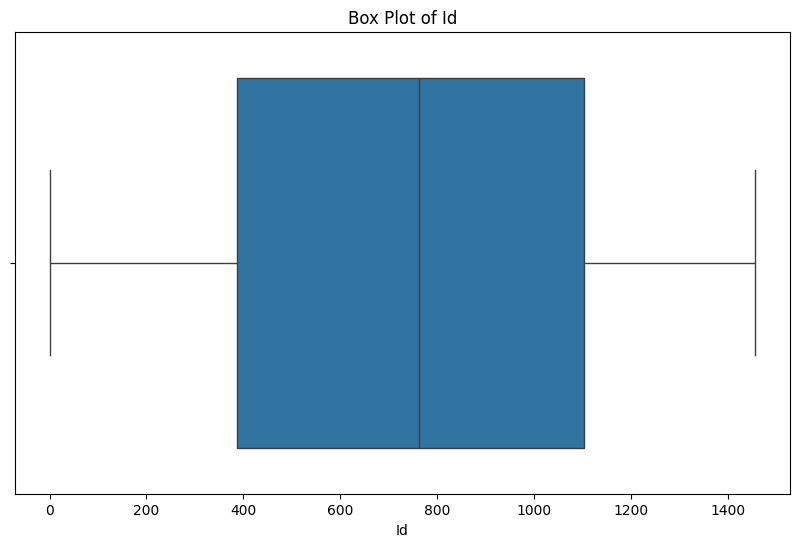

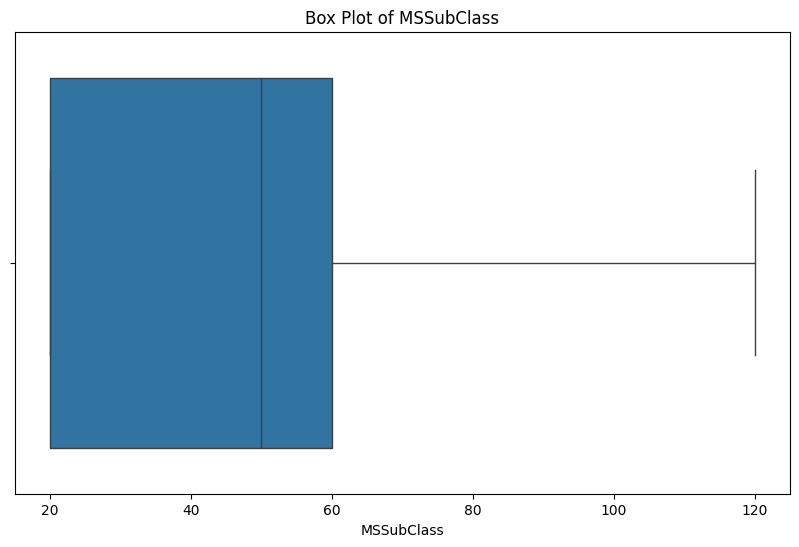

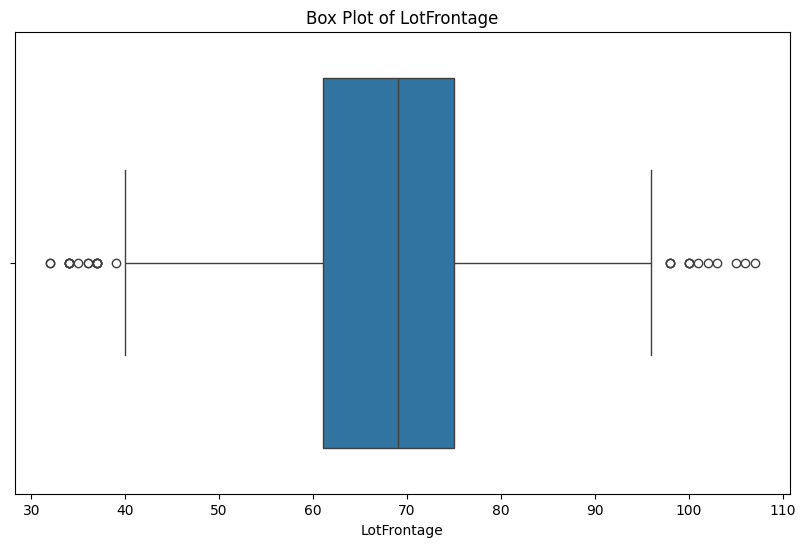

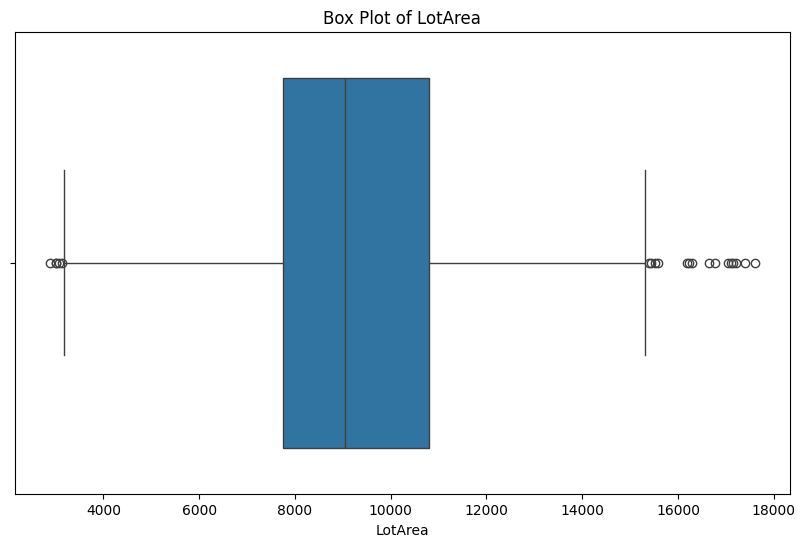

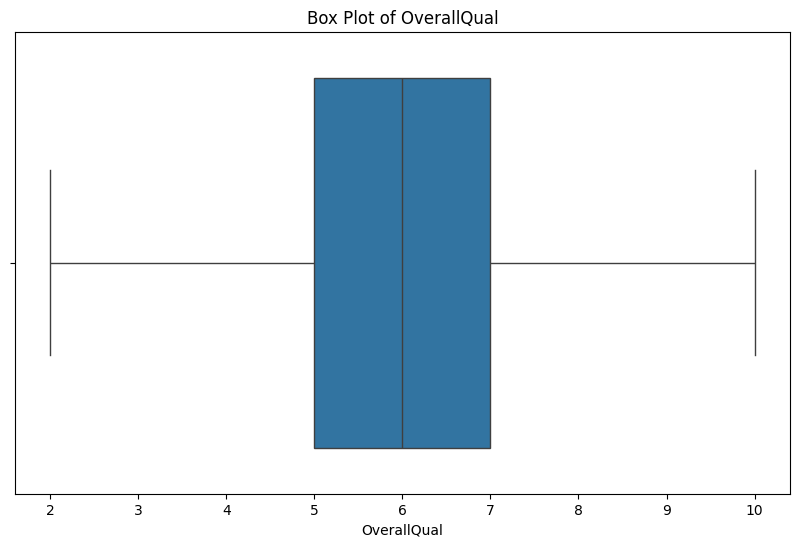

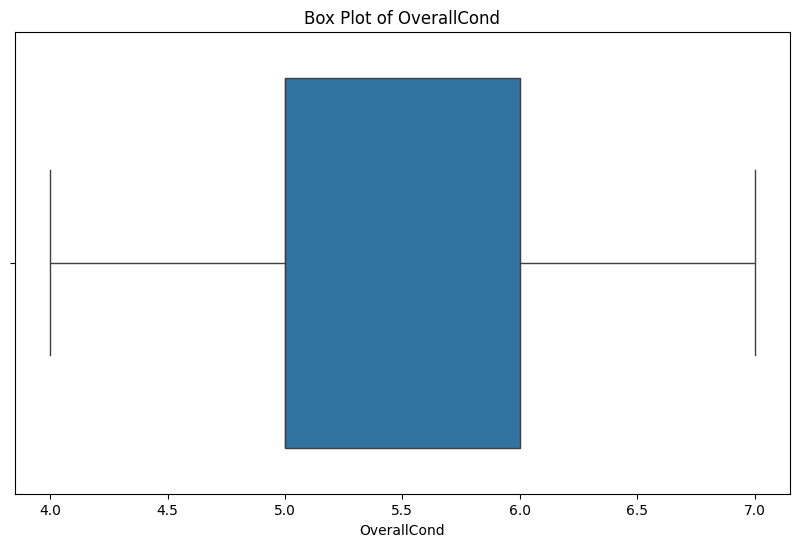

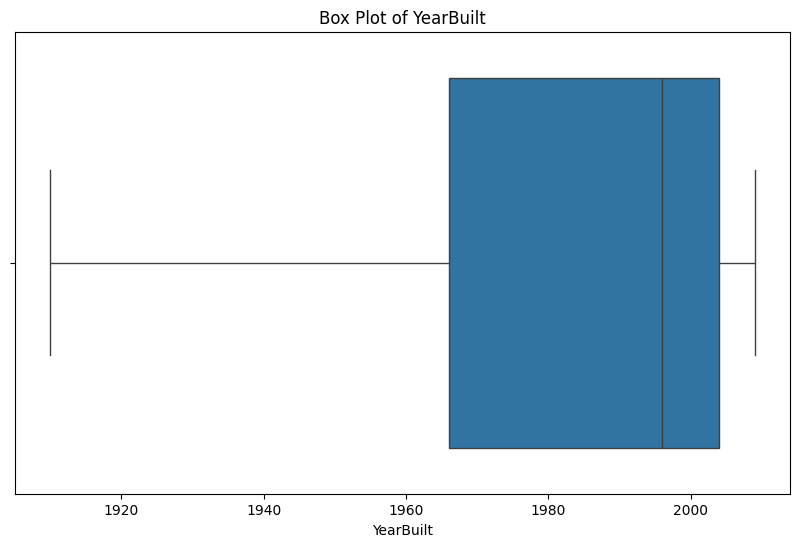

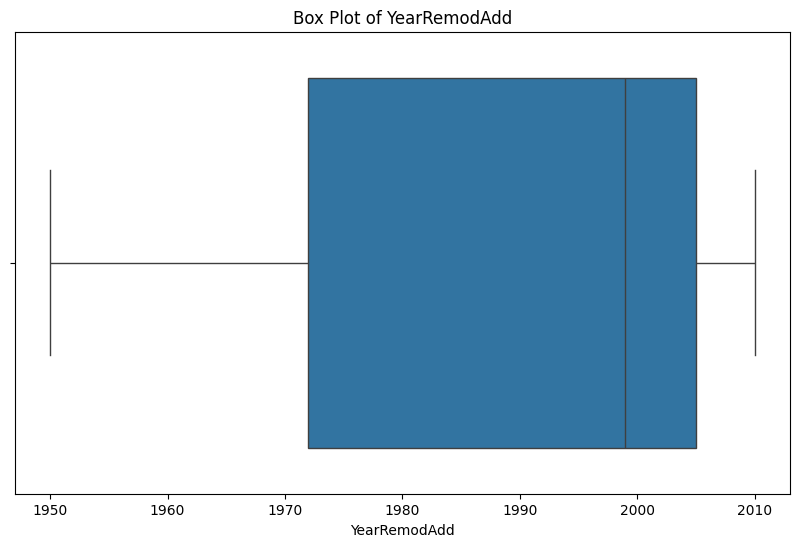

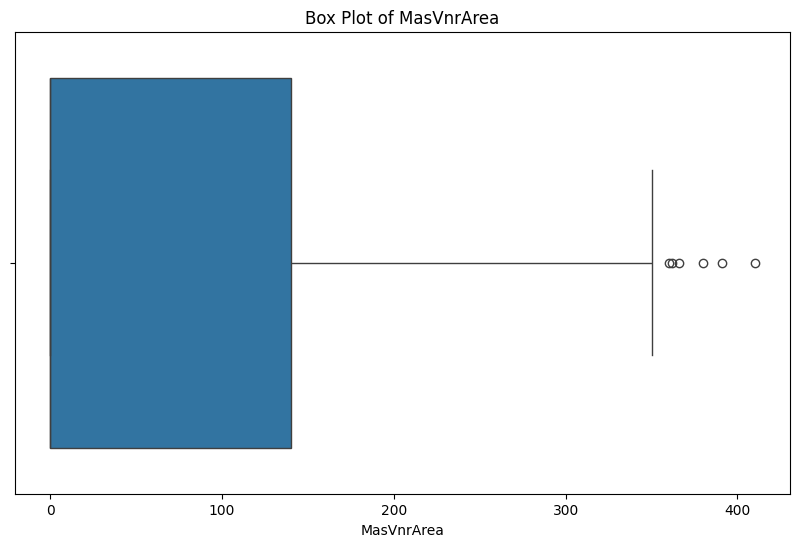

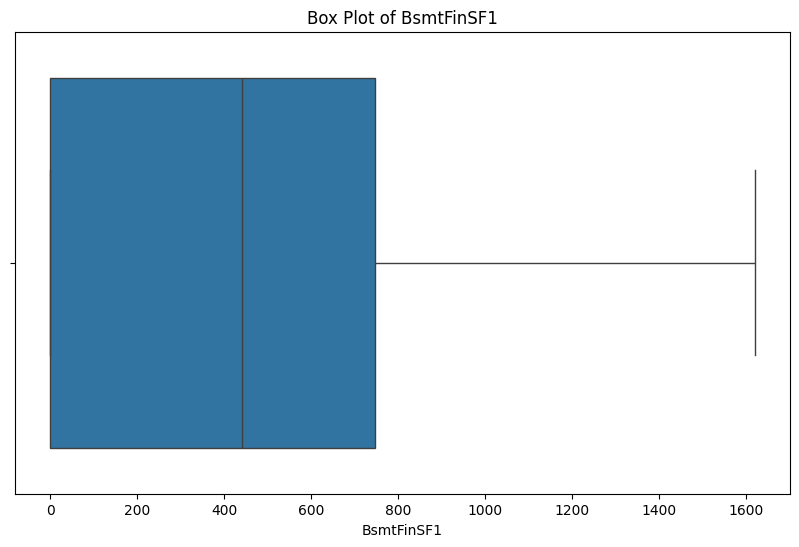

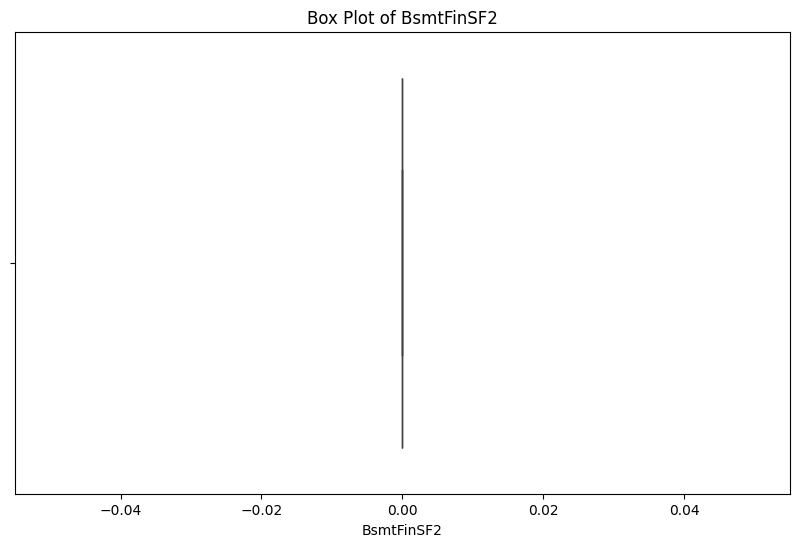

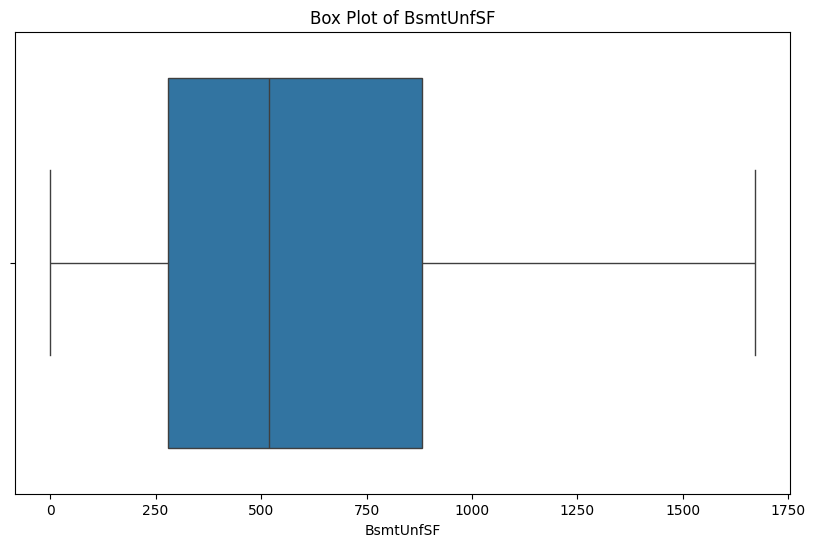

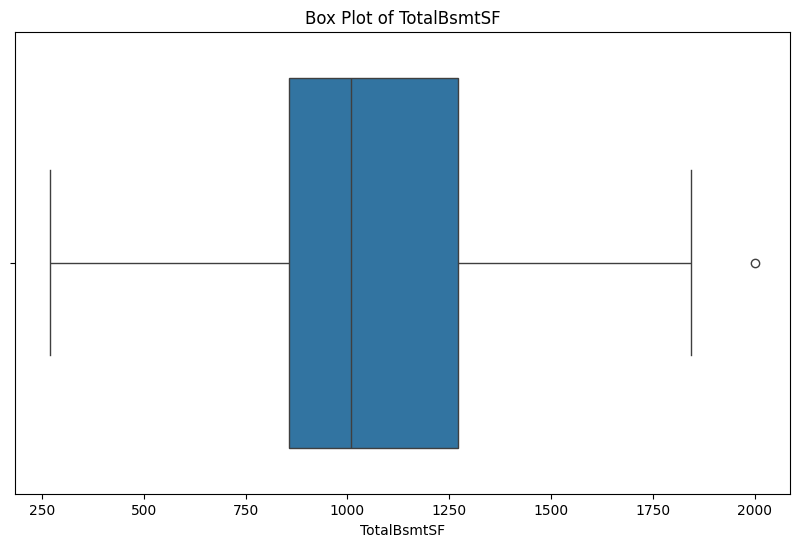

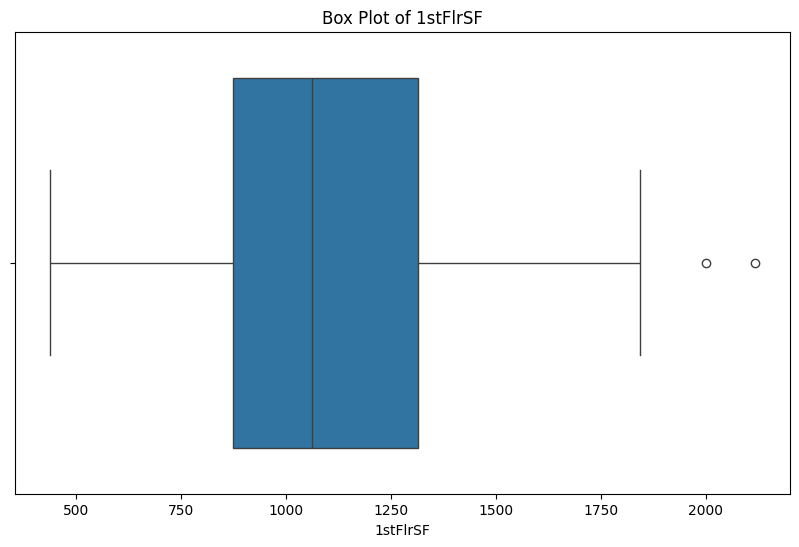

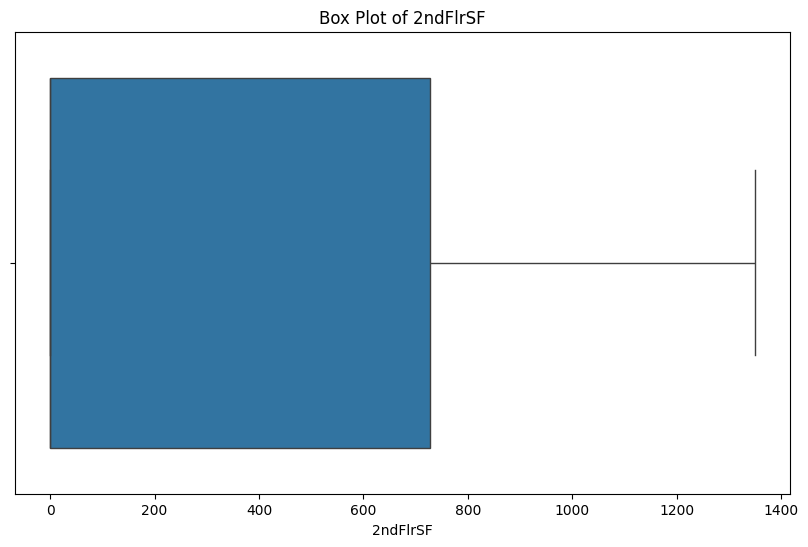

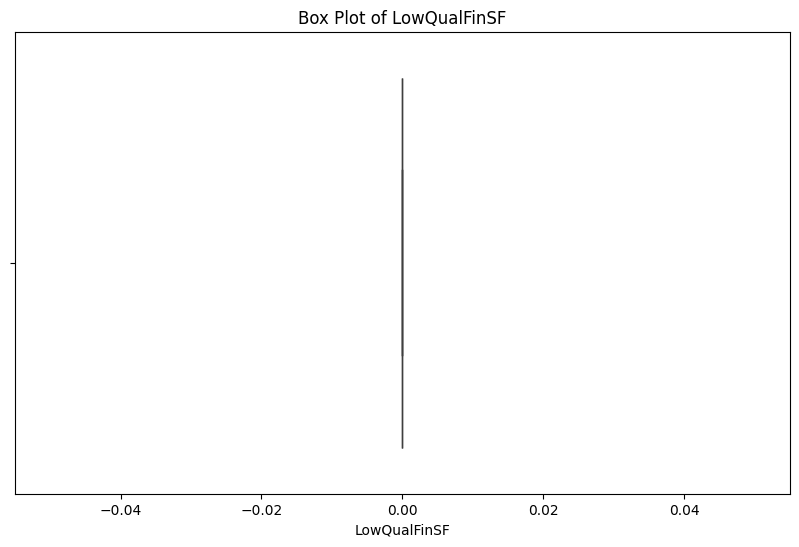

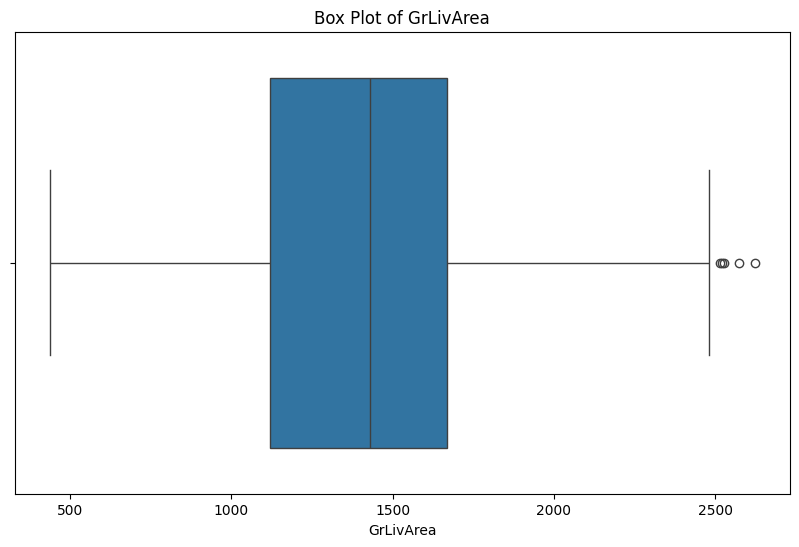

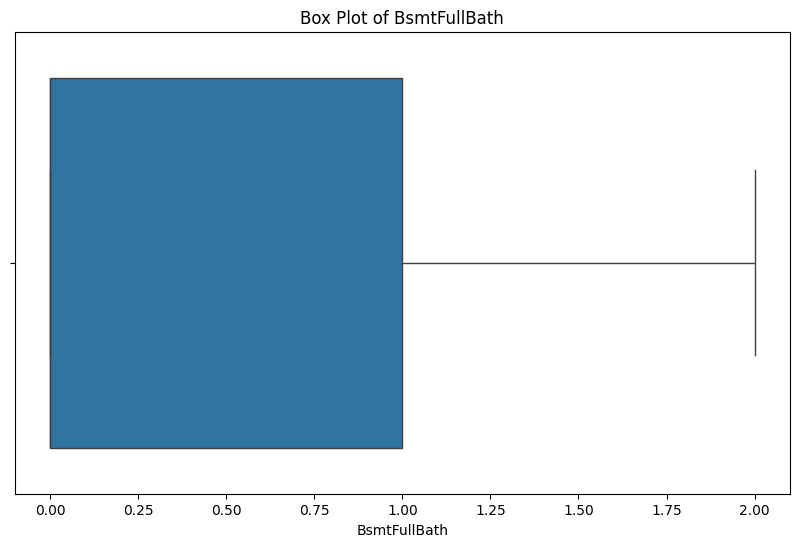

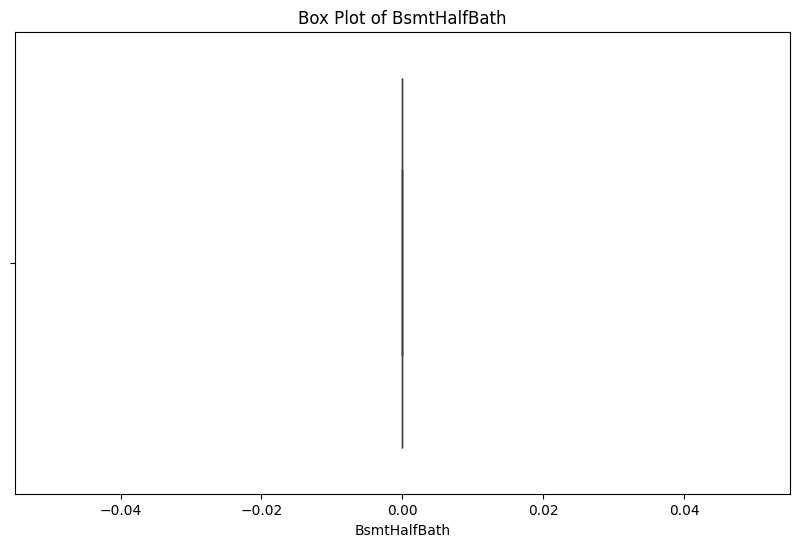

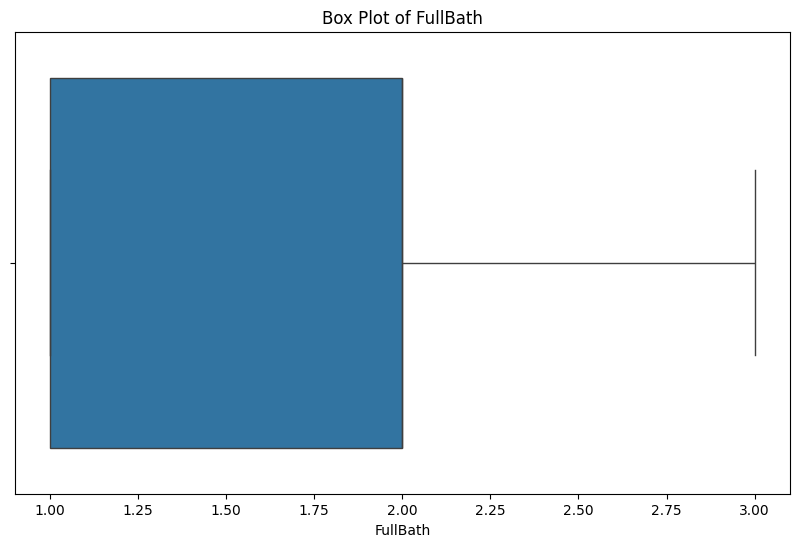

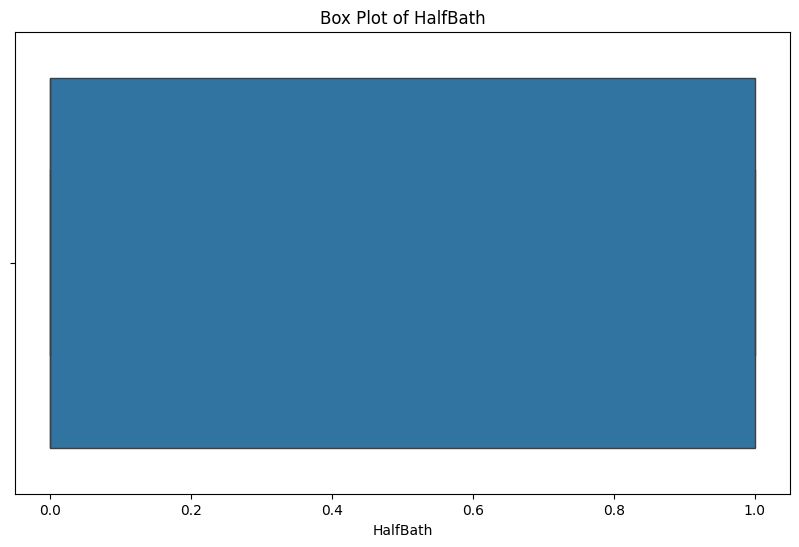

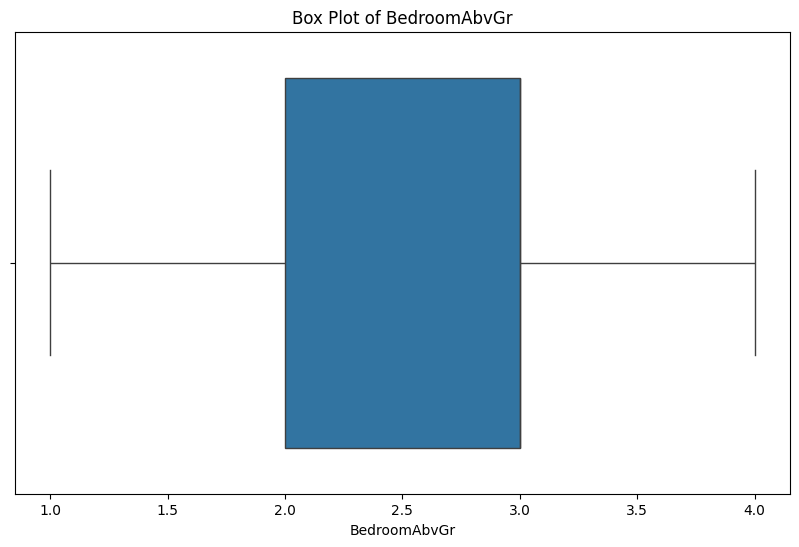

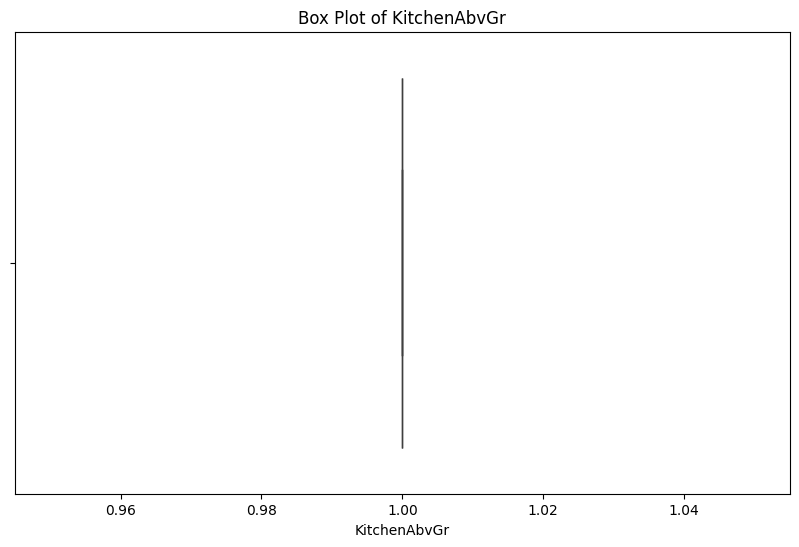

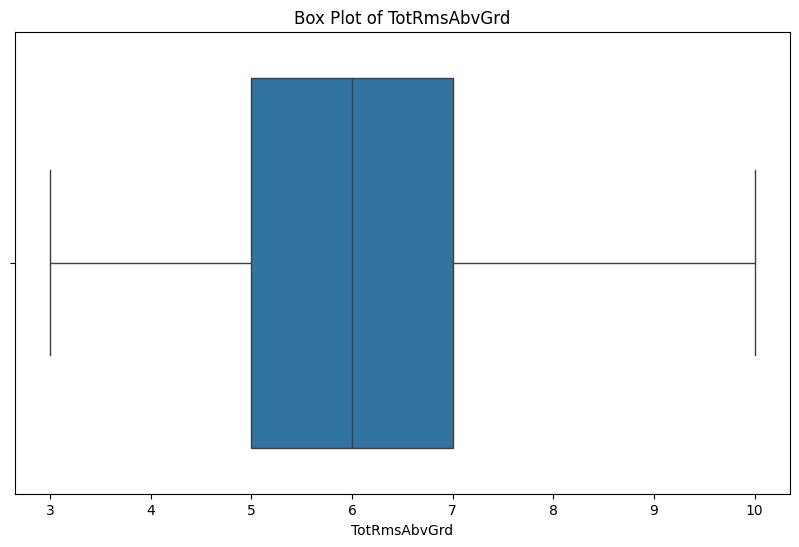

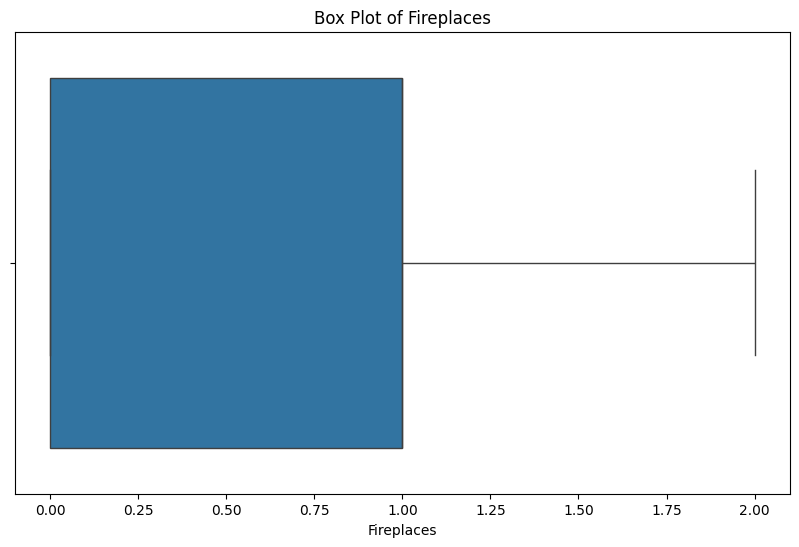

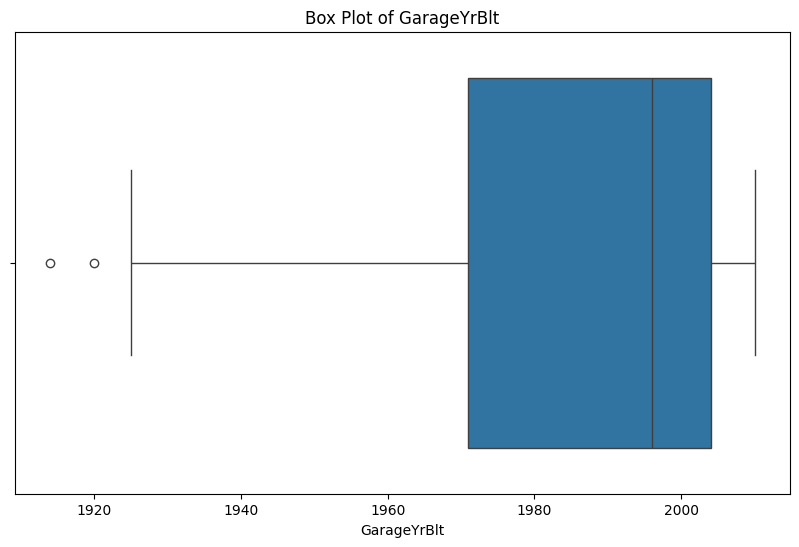

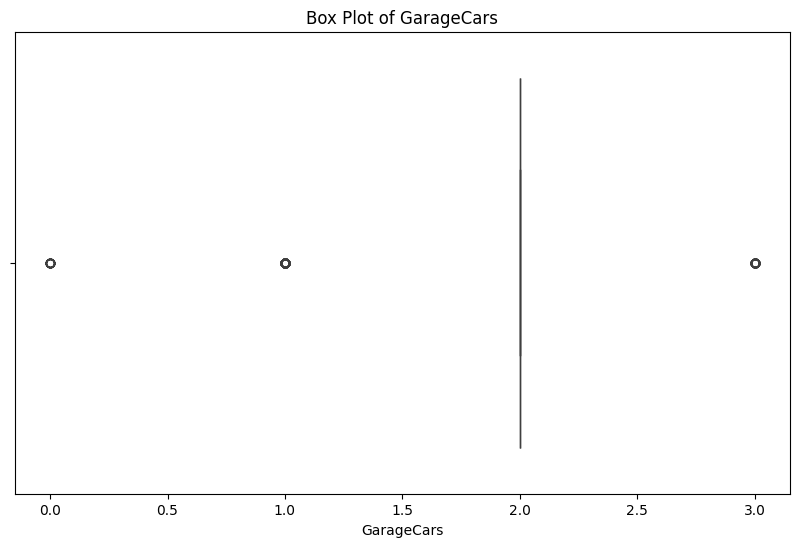

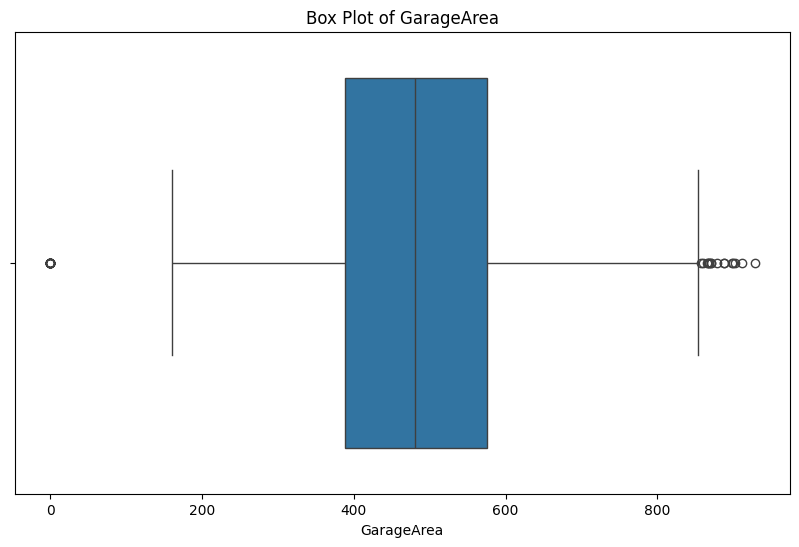

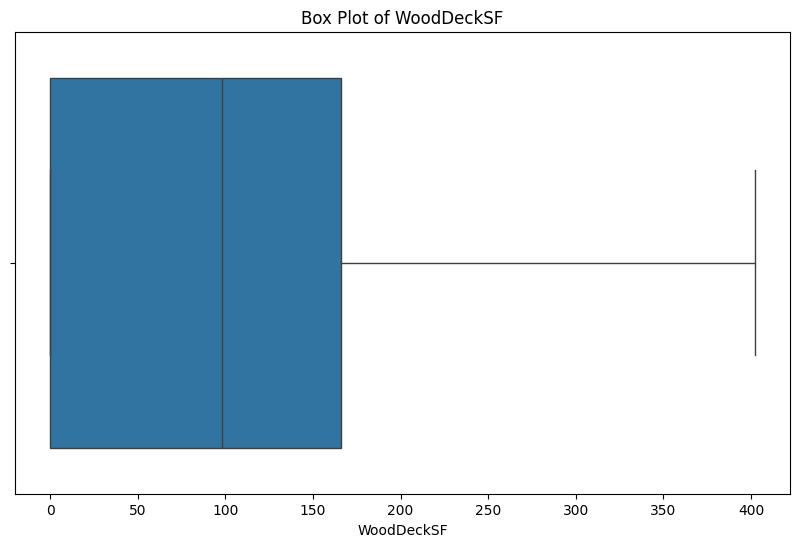

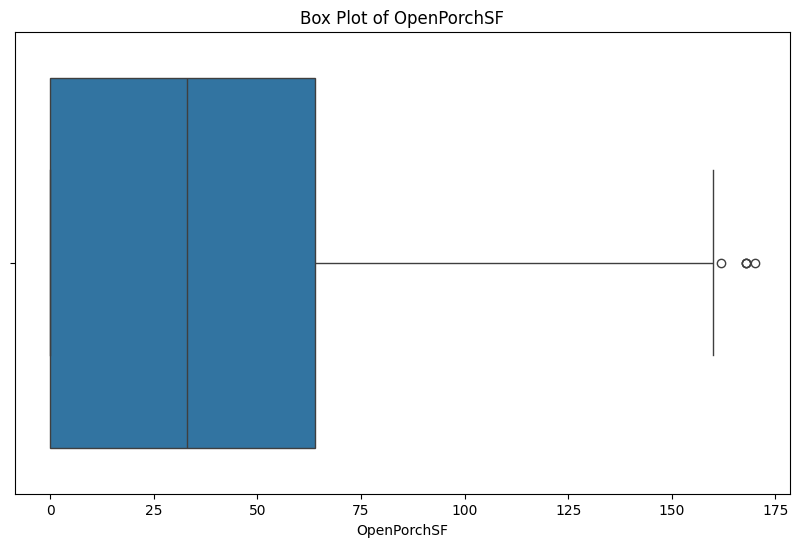

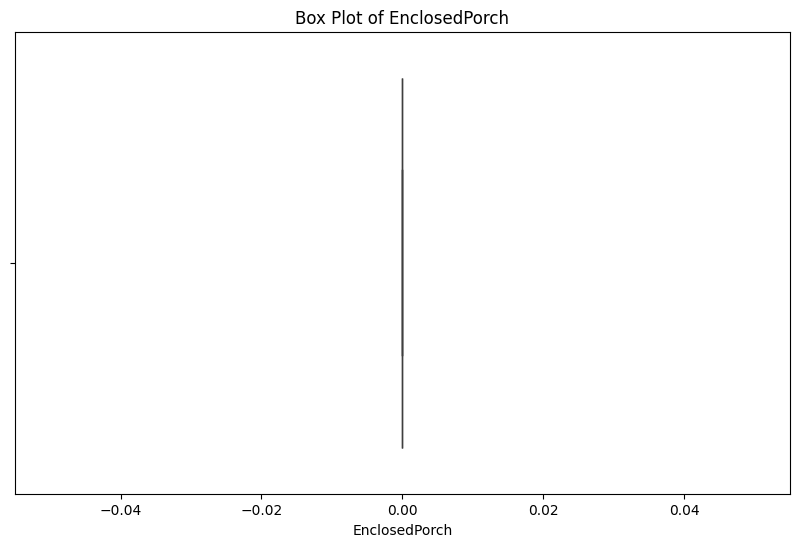

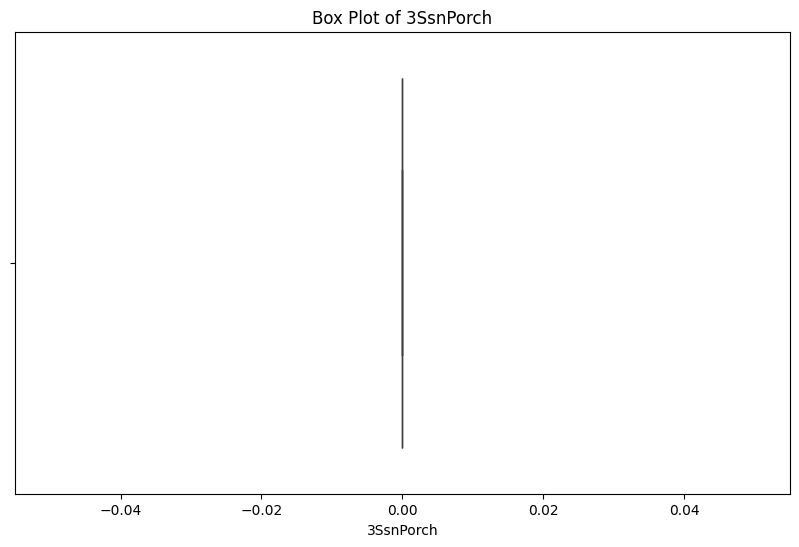

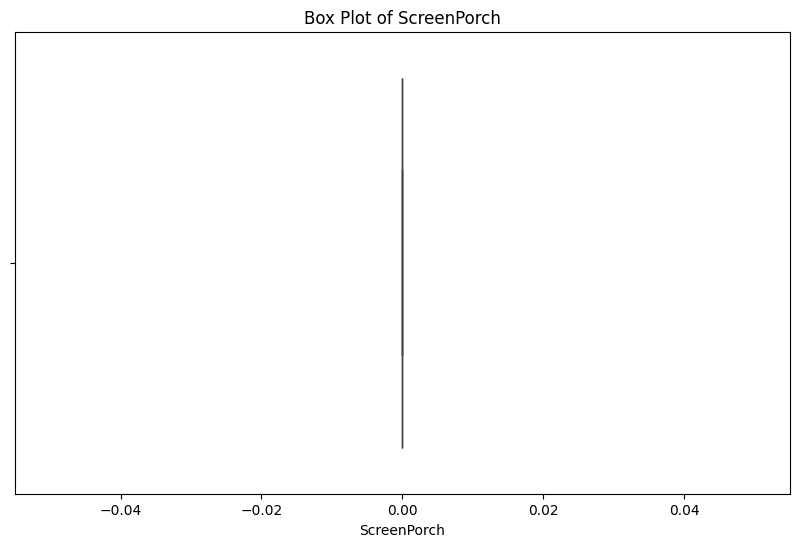

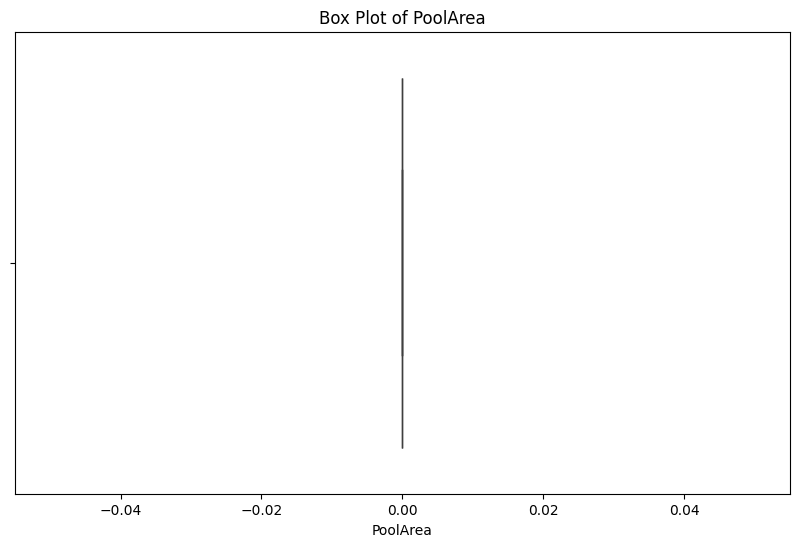

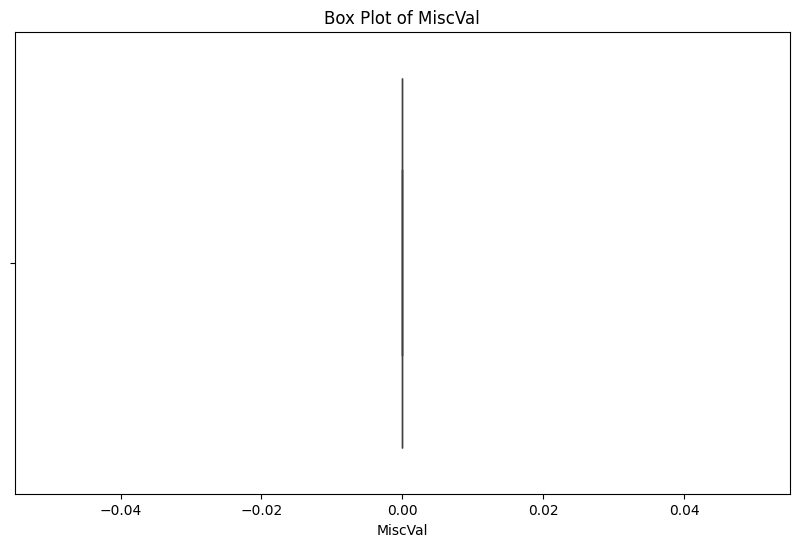

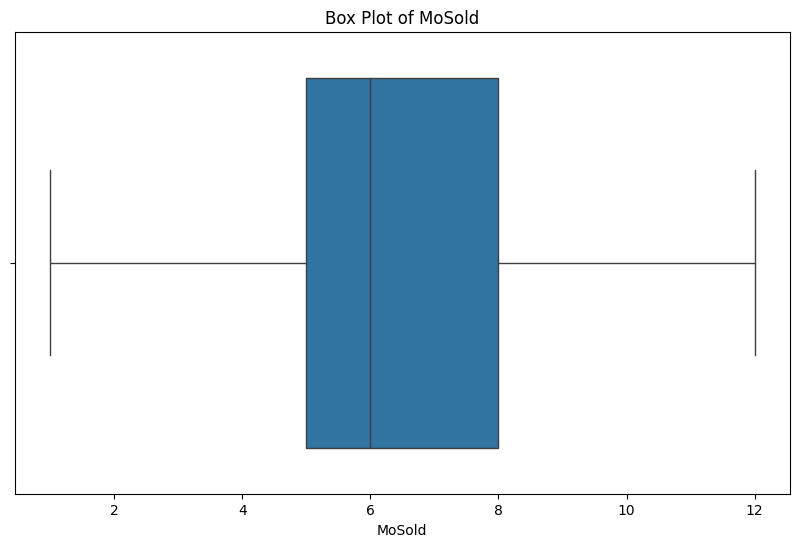

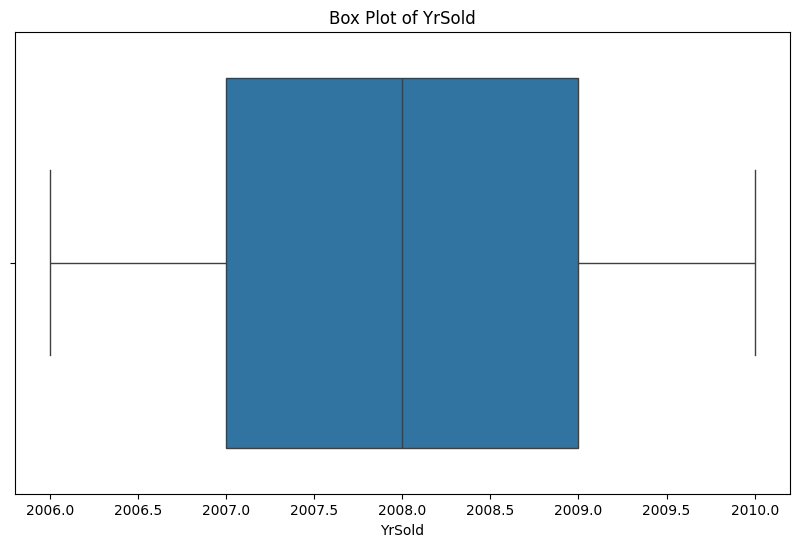

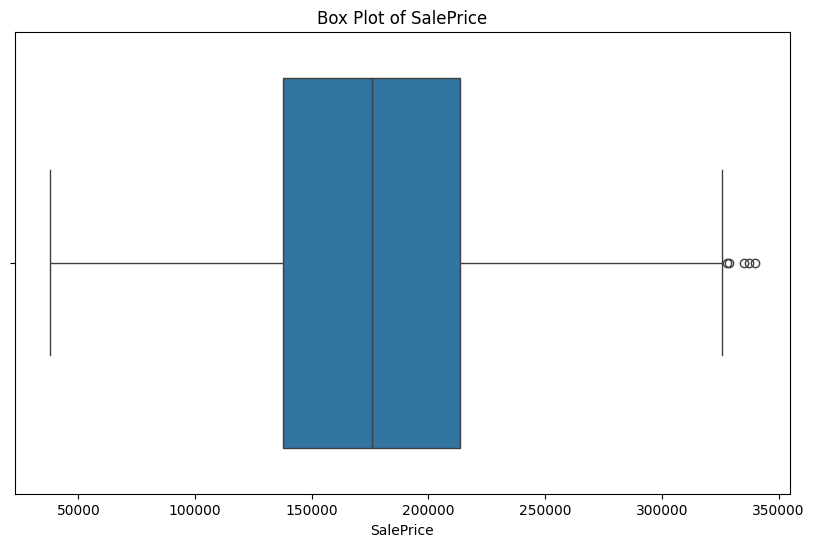

In [100]:
for feature in numeric_feature:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

### NORMALISASI DAN STANDARDISASI DATA

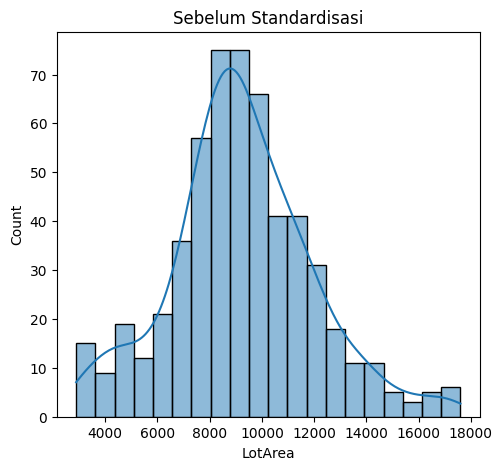

In [106]:
# sebelum standardisasi
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train[numeric_feature[3]],kde=True)
plt.title('Sebelum Standardisasi')
plt.show()

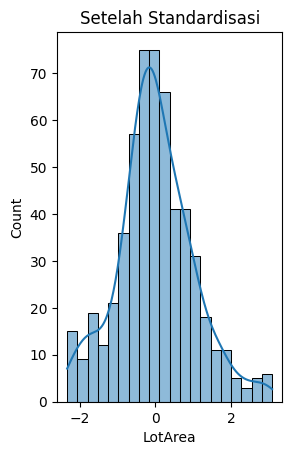

In [107]:
scaler = sci.StandardScaler()
train[numeric_feature] = scaler.fit_transform(train[numeric_feature])

plt.subplot(1,2,1)
sns.histplot(train[numeric_feature[3]], kde=True)
plt.title('Setelah Standardisasi')
plt.show()

### DUPLIKASI DATA|

In [109]:
train = train.drop_duplicates()

## ENCODING

### HOT ENCODING

In [114]:
train_onehot = pd.get_dummies(train, columns = categorical_feature)
train_onehot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


### LABEL ENCODING

In [116]:
label_encoding = sci.LabelEncoder()
train_lencoding = pd.DataFrame(train)

for column in categorical_feature:
    train_lencoding[column] = label_encoding.fit_transform(train_lencoding[column])

train_lencoding

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


# EDA (EXPLORATORY DATA ANALYSIS)

## ANALISIS DISKRIPTIF

In [117]:
train_lencoding.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,5.570000e+02,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,5.102641e-17,7.175589e-17,-5.102641e-16,3.236988e-16,2.328080e-16,1.052420e-16,-2.407809e-16,8.873811e-16,7.653961e-17,-3.189151e-18,...,2.328546,3.956912,2.382406,0.680431,1.082585,1.947935,2.958707,1.942549,7.475763,2.910233
std,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,1.000899e+00,...,0.708220,0.302763,0.876910,1.198858,0.793636,0.315915,0.334068,0.317821,1.519018,0.832686
min,-1.768952e+00,-9.176372e-01,-2.772055e+00,-2.328982e+00,-3.412393e+00,-1.939637e+00,-2.931004e+00,-2.002473e+00,-7.017659e-01,-1.088417e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.452812e-01,-9.176372e-01,-5.688959e-01,-5.415363e-01,-9.962454e-01,-5.236765e-01,-6.938963e-01,-8.788215e-01,-7.017659e-01,-1.088417e+00,...,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,3.000000,2.000000,8.000000,3.000000
50%,4.736214e-02,3.833023e-02,3.887205e-02,-6.848630e-02,-1.908627e-01,-5.236765e-01,5.045541e-01,5.002057e-01,-7.017659e-01,-6.678644e-03,...,2.000000,4.000000,2.000000,0.000000,1.000000,2.000000,3.000000,2.000000,8.000000,3.000000
75%,8.612428e-01,3.569860e-01,4.946980e-01,5.795224e-01,6.145200e-01,8.922838e-01,8.241409e-01,8.066562e-01,6.451465e-01,7.373223e-01,...,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000
max,1.703764e+00,2.268921e+00,2.925770e+00,3.078932e+00,3.030668e+00,2.308244e+00,1.023883e+00,1.062032e+00,3.242763e+00,2.873877e+00,...,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,8.000000,4.000000


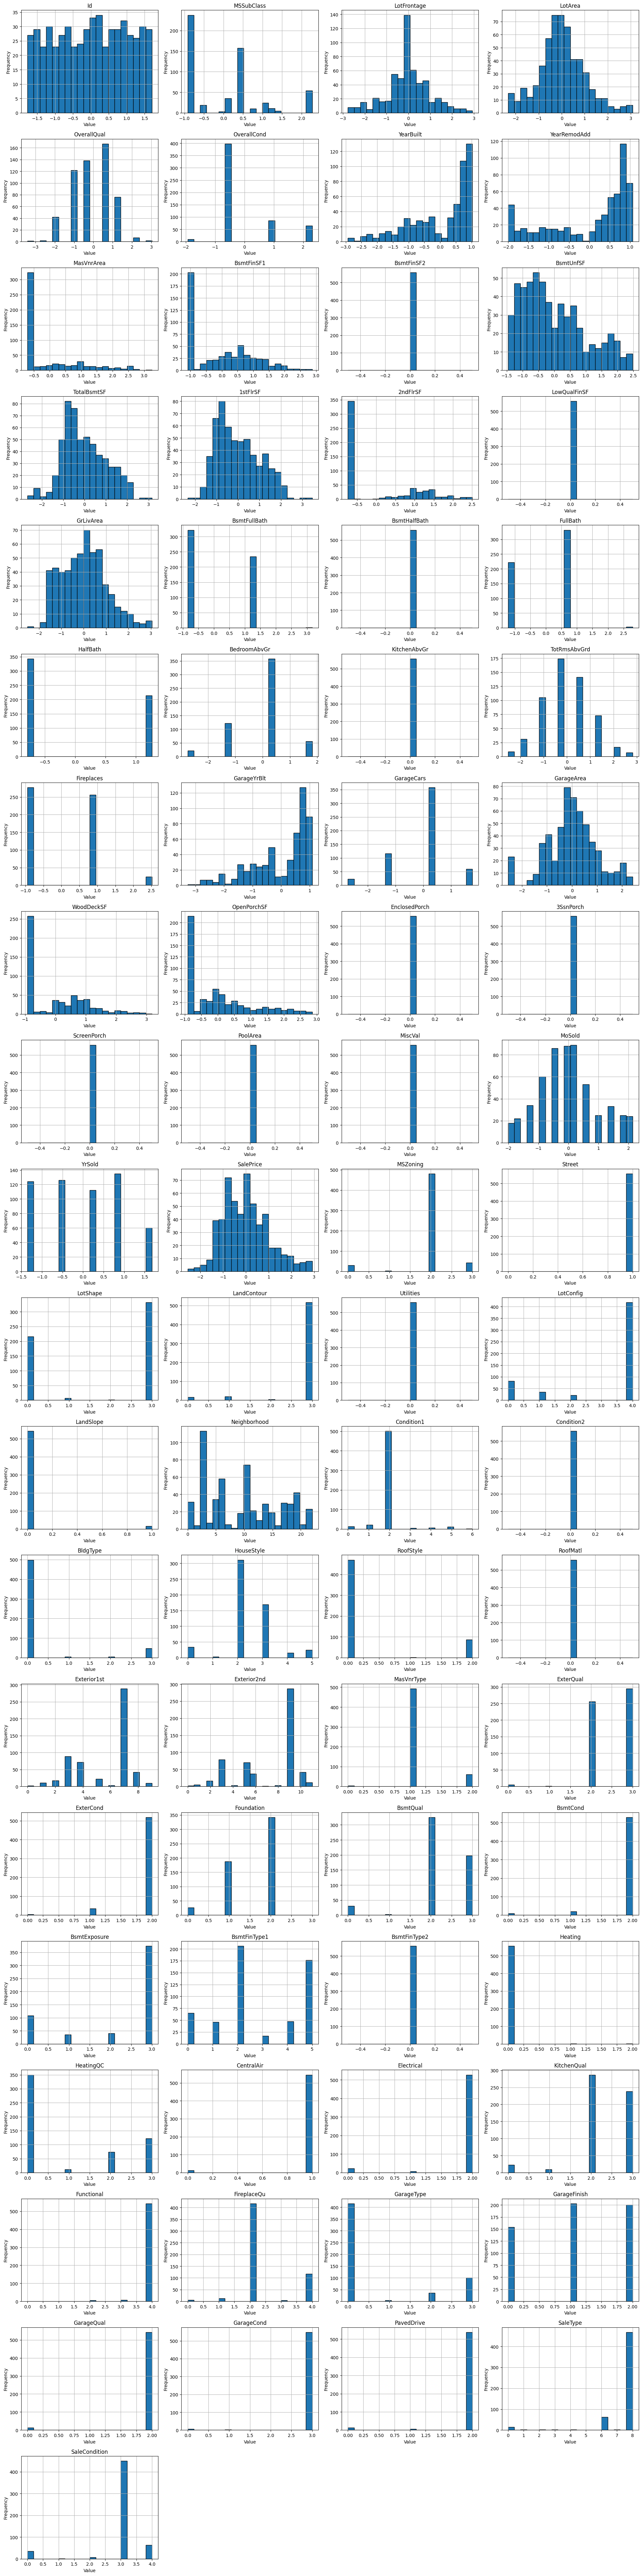

In [125]:
# menentukan jumlah kolom tabel
num_vars = train_lencoding.shape[1] # return value => [jumlah baris, jumlah kolom]

# Menentukan jumlah baris dan kolom pada grid subplot
n_cols = 4
n_rows = -(-num_vars//n_cols) # metode ceiling division
# num_vars => pembulatan kebawah
# -num_vars => pembulatan keatas

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes aray untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variable
for i, column in enumerate(train_lencoding.columns):
    train_lencoding[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


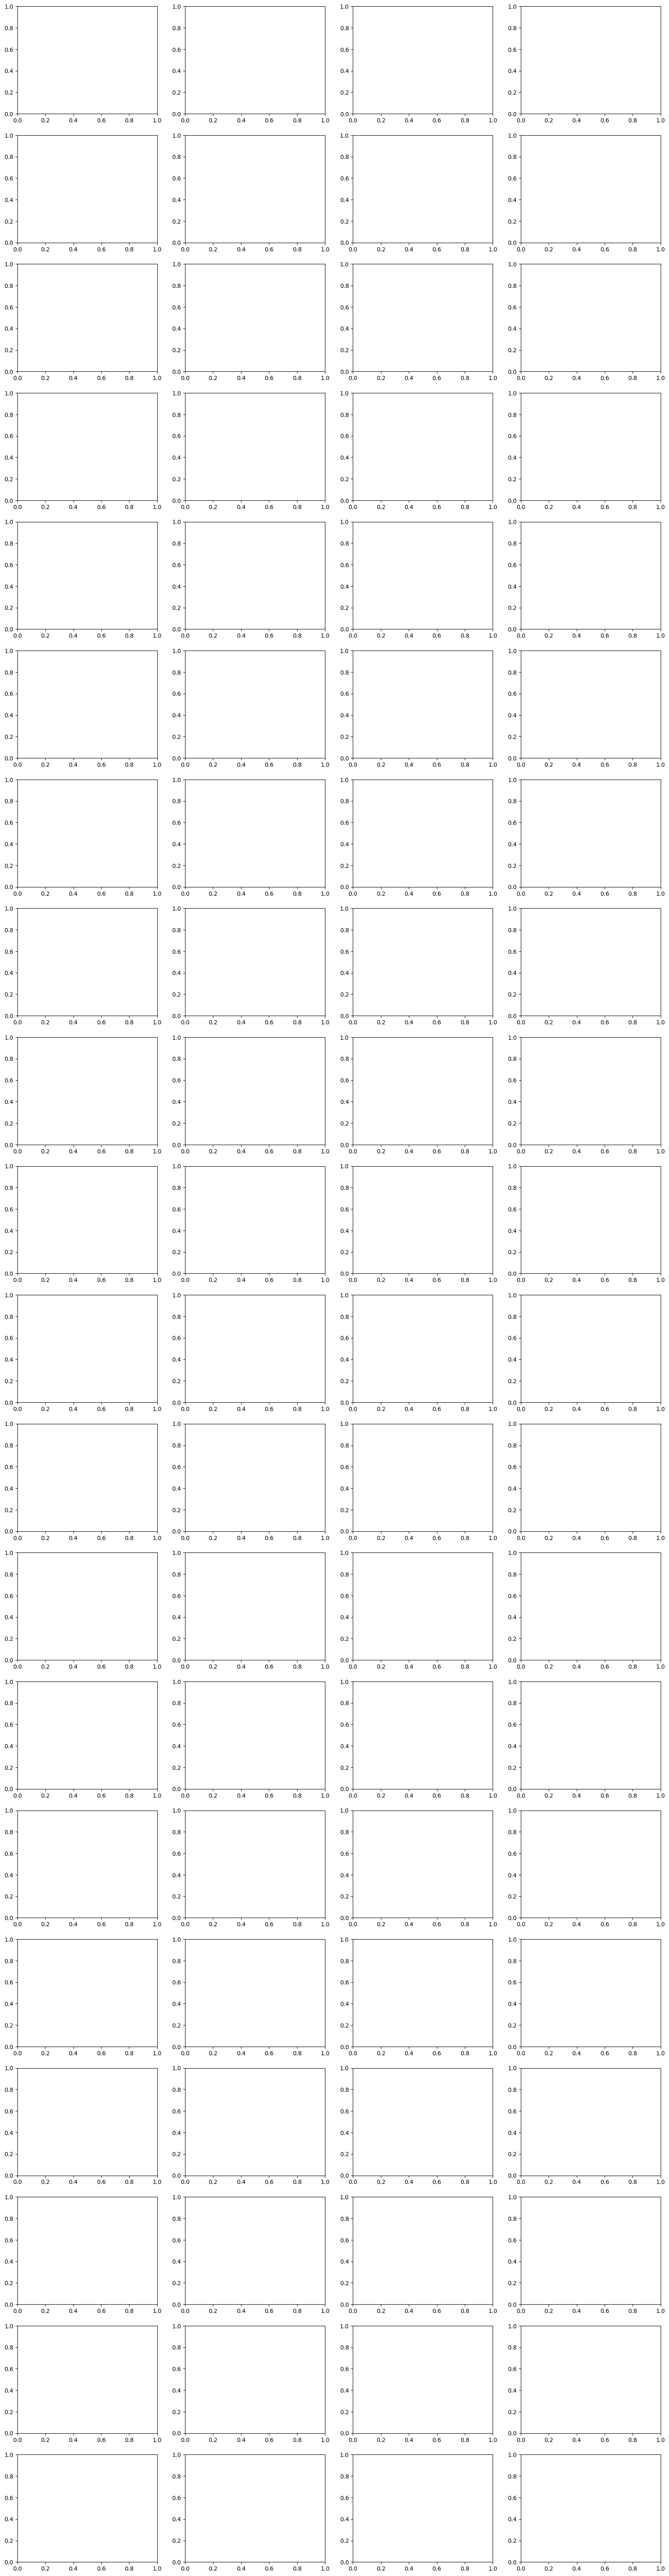

In [126]:
# Saat menggunakan plt.subplots(), kita mendapatkan dua objek:
# > fig: Objek Figure yang merupakan "kanvas" besar tempat semua plot dan subplot ditempatkan.
# > axes: Objek Axes yang merupakan bagian dari fig tempat plot individu
# (seperti histogram, scatter plot, dll) ditempatkan.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
print(axes)

In [ ]:
# axes adalah array 2D (matriks) yang berisi objek Axes untuk setiap subplot.
# Masing-masing objek axes[i, j] (untuk baris ke-i dan kolom ke-j) mengontrol plot pada posisi itu.

In [127]:
# FLATTEN
# untuk mempermudah iterasi dan manipulasi subplot, axes sering diratakan (flatten) menjadi array 1D,
axes = axes.flatten()
print(axes)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


In [128]:
# Setiap objek Axes memiliki metode yang memungkinkan kamu untuk menggambar elemen plot, seperti:

# axes[i].hist(...): Untuk menggambar histogram pada subplot ke-i.
# axes[i].set_title(...): Untuk mengatur judul pada subplot ke-i.
# axes[i].set_xlabel(...): Untuk memberi label pada sumbu x.
# axes[i].set_ylabel(...): Untuk memberi label pada sumbu y.

### VISUALISASI DISTRIBUSI BEBERAPA KOLOM

In [135]:
# ENUMERATE
# Kode enumerate digunakan untuk mengiterasi elemen-elemen dalam suatu iterable (dalam hal ini, columns_to_plot)
# dan menghasilkan dua nilai dalam setiap iterasi: indeks dan elemen itu sendiri

columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']
for i,column in enumerate(columns_to_plot):
    print(i, column)
print('#####')
for j, column in enumerate(columns_to_plot,1):
    print(j, column)

0 OverallQual
1 YearBuilt
2 LotArea
3 SaleType
4 SaleCondition
#####
1 OverallQual
2 YearBuilt
3 LotArea
4 SaleType
5 SaleCondition


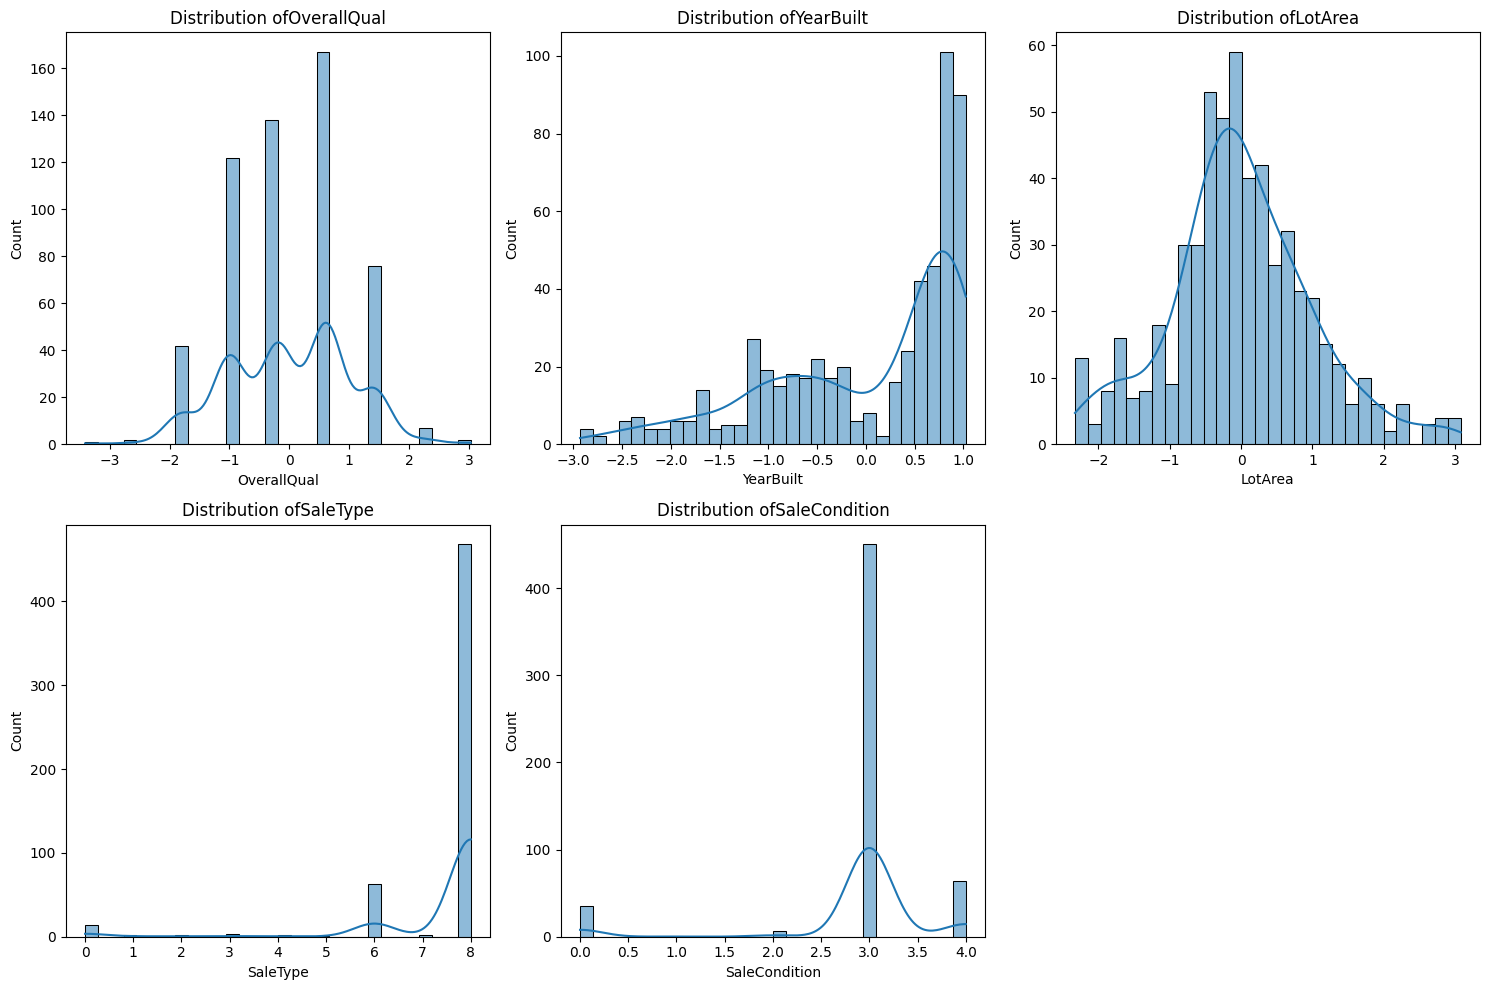

In [141]:
plt.figure(figsize=(15,10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2,3,i)
    sns.histplot(train_lencoding[column], kde=True,bins=30)
    plt.title(f'Distribution of{column}')

plt.tight_layout()
plt.show()

In [ ]:
# SUBPLOT
# TANPA SUBPLOT, SELURUH GRAFIK AKAN DIJADIKAN SATU
# plt.subplot(2,3,i)
# Fungsi plt.subplot() digunakan untuk membuat grid subplots.
# 2, 3 adalah jumlah baris dan kolom dari grid subplot, yang berarti grid tersebut memiliki 2 baris dan 3 kolom.
# i adalah nomor urut subplot yang sedang diproses, yang berguna untuk menempatkan plot
# di posisi yang tepat di grid.
# Misalnya, jika i=1, maka subplot yang aktif adalah subplot pertama pada grid
# (pada posisi baris pertama kolom pertama).
# Jika i=2, maka subplot kedua pada baris pertama kolom kedua, dan seterusnya.

In [ ]:
# sns.histplot()
# sns.histplot(train_lencoding[column], kde=True, bins=30)
# sns.histplot() adalah fungsi dari seaborn yang digunakan untuk membuat plot histogram.
# train_lencoding[column] adalah data yang akan dipetakan dalam histogram. Ini mengacu pada kolom column
# dalam DataFrame train_lencoding.
# kde=True mengaktifkan plot Kernel Density Estimate (KDE), yang memungkinkan kita melihat distribusi data
# dalam bentuk garis halus di atas histogram. KDE memberikan gambaran tentang distribusi data yang lebih mulus.
# bins=30 mengatur jumlah bin (atau interval) dalam histogram menjadi 30. Ini menentukan berapa banyak interval data yang akan dibagi dalam histogram.

## ANALISA KORELASI

In [146]:
plt.figure(figsize=(12,10))
correlation_matrix = train_lencoding.corr()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(correlation_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.039030    -0.058037  0.014602    -0.007280   
MSSubClass     0.039030    1.000000    -0.323656 -0.358085     0.256584   
LotFrontage   -0.058037   -0.323656     1.000000  0.488661     0.213605   
LotArea        0.014602   -0.358085     0.488661  1.000000     0.129987   
OverallQual   -0.007280    0.256584     0.213605  0.129987     1.000000   
OverallCond    0.001043   -0.149635    -0.088954 -0.147703    -0.372252   
YearBuilt     -0.019589    0.220778     0.159561  0.085600     0.664510   
YearRemodAdd   0.009514    0.197140     0.095193  0.023931     0.585619   
MasVnrArea    -0.037895    0.053213     0.286222  0.127286     0.363920   
BsmtFinSF1    -0.021362   -0.009240     0.012625  0.089259     0.029434   
BsmtFinSF2          NaN         NaN          NaN       NaN          NaN   
BsmtUnfSF     -0.004783   -0.105592     0.068446  0.000874     0.295311   
TotalBsmtSF   -0.036232  

<Figure size 1200x1000 with 0 Axes>

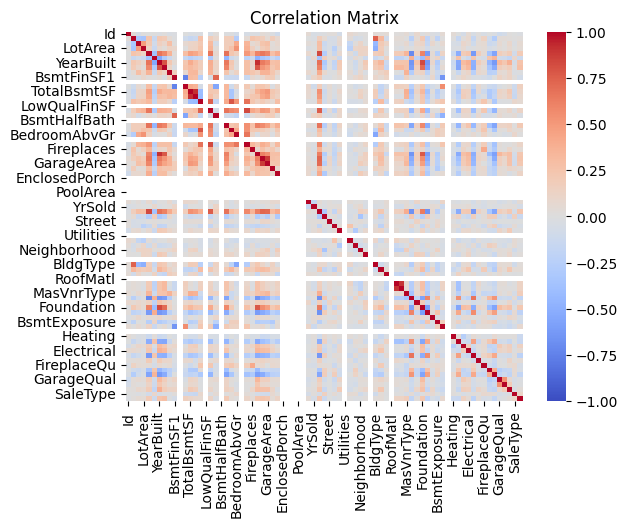

In [147]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

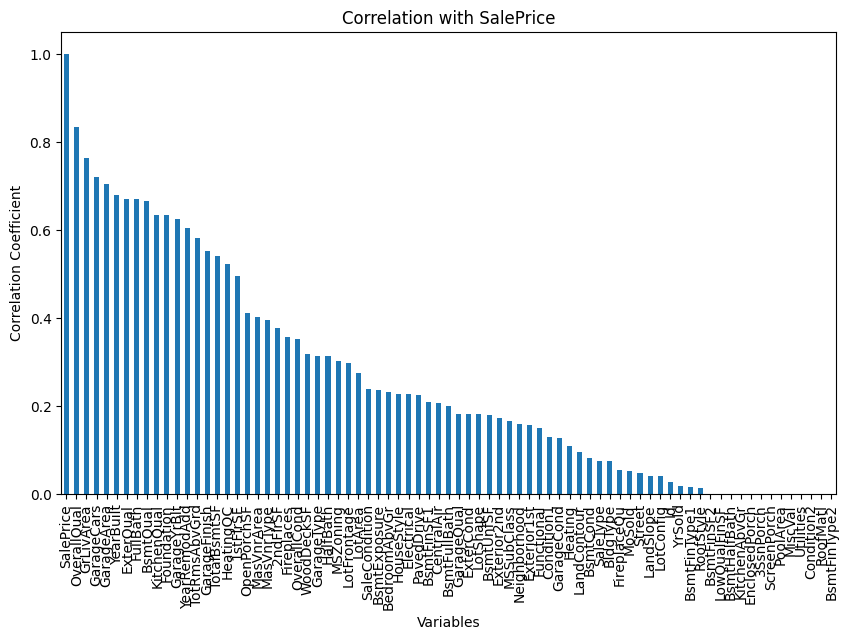

In [149]:
# hanya fokus pada saleprice
target_corr = train_lencoding.corr()['SalePrice']

# mengurutkan
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
target_corr_sorted.plot(kind='bar')
plt.title('Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [152]:
train.to_csv('train_after_clean.csv', index=False)
train.to_excel('train_after_clean.xlsx', index=False)
train_lencoding.to_csv('train_after_lencoding.csv', index=False)